# Customer Personality Analysis
## Introduction 
Understanding customer personality through data analysis is crucial for businesses to succeed in today's competitive business landscape. Businesses can gain valuable insights that drive strategic decision-making and enhance customer engagement by analyzing demographic data, purchasing habits, and marketing responses. The Customer Personality Analysis dataset offers rich information, including demographic attributes, purchasing habits, and marketing campaign responses. This part analyzes the dataset to uncover hidden patterns, segment customers, and derive actionable insights. Advanced data mining techniques and statistical analyses help illuminate factors shaping customer behavior, identify opportunities for personalized marketing strategies, and foster stronger customer relationships.

### Research Questions
- How do different demographic factors (such as age, education, marital status, and income) correlate with customer spending behavior?
- Are there distinct customer segments based on their purchasing habits and responses to marketing campaigns?
- What are the characteristics of customers who are more likely to accept marketing offers and campaigns?
- Can we identify patterns in customer complaints and their relationship with other attributes?
- How do online and offline purchasing behaviors differ among customer segments?
- Is there a relationship between recency of purchase and customer loyalty or satisfaction?
- Are there any trends or patterns in website visits and their relationship with purchasing behavior?

### Data Mining Problem and Objectives:
#### Problem
The main problem is to segment customers effectively based on their behavior and demographics to tailor marketing strategies and product offerings accordingly.

#### Objectives
- Perform clustering to identify distinct customer segments.
- Analyze the characteristics and behaviors of each segment.
- Understand the factors influencing customer responses to marketing campaigns.
- Identify potential areas for improvement in customer satisfaction and loyalty.
- Provide actionable insights for marketing strategies and product development.

### Formulation of the Problem
#### Data Mining Techniques
Clustering techniques such as K-means, hierarchical clustering, or density-based clustering will be utilized to segment customers based on their attributes and behaviors. Additionally, association rule mining can be used to identify patterns in customer behavior, such as relationships between different types of purchases or responses to marketing campaigns.

#### Problem Formulation
Given the Customer Personality Analysis dataset, the objective is to segment customers into homogenous groups based on their demographic information, purchasing behavior, responses to marketing campaigns, and other relevant attributes. This segmentation will allow us to gain insights into different customer personas and tailor marketing strategies and product offerings to meet their specific needs and preferences.

### Approach
- **Data Preprocessing:** Clean the data, handle missing values, and transform categorical variables as needed.
- **Exploratory Data Analysis (EDA):** Understand the distribution of variables, identify correlations, and visualize patterns in the data.
- **Clustering:** Apply clustering algorithms to segment customers into distinct groups based on their attributes and behaviors.
- **Interpretation:** Analyze the characteristics and behaviors of each segment, identify key differences and similarities, and interpret the results in the context of the research questions and business objectives.
- **Evaluation:** Evaluate the effectiveness of the clustering solution based on internal metrics (e.g., silhouette score) and external validation (e.g., domain expert feedback).
- **Insights & Recommendations:** Provide actionable insights and recommendations for marketing strategies, product development, and customer relationship management based on the findings from the analysis.

# Implementation

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from matplotlib import colors
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import pickle
import warnings

%matplotlib inline
mpl.style.use('ggplot')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. Data Wrangling

In [2]:
# load the customer personality dataset
customer_data = pd.read_csv('Data/Customer_personality.csv')
print(customer_data.shape)
customer_data.head()

(2240, 29)


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [3]:
# Information on features 
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# check the null counts
customer_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- **Missing Income Values:** The dataset contains missing values in the 'Income' column, which need to be addressed to ensure data accuracy.
- **Dt_Customer Format:** The 'Dt_Customer' column, representing customer join dates, isn't in DateTime format, hindering time-based analysis.
- **Categorical Features:** Some features are categorical ('datatype: object'), requiring encoding into numeric forms for analysis, like one-hot or label encoding.

## 2. Data Preprocessing and Feature Engineering
### 2.1. Handling missing values

In [5]:
customer_data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [6]:
# replace missing values of Income with mean of Income
customer_data['Income'].fillna(customer_data['Income'].mean(), 
                               inplace = True)

In [7]:
customer_data['Income'].isnull().sum()

0

### 2.2. Convert Dt_Customer datatype

In [8]:
# change datatype of Dt_Customer
customer_data["Dt_Customer"] = pd.to_datetime(customer_data["Dt_Customer"], 
                                              format="%d-%m-%Y")

dates = []
for i in customer_data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

# Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


### 2.3. Feature Extraction

In [9]:
# Extract the "Age" of a customer in 2014.
customer_data["Age"] = 2014 - customer_data['Year_Birth']
customer_data.shape

(2240, 30)

In [10]:
# Get the total spent by the customer in various categories.
customer_data["Spent"] = (customer_data["MntWines"] + customer_data["MntFruits"] + 
                          customer_data["MntMeatProducts"] + customer_data["MntFishProducts"] + 
                          customer_data["MntSweetProducts"] + customer_data["MntGoldProds"])
customer_data.shape

(2240, 31)

In [11]:
# Deriving living situation by marital status.
customer_data["Living_With"] = customer_data["Marital_Status"].replace({"Married":"Partner", 
                                                                        "Together":"Partner", 
                                                                        "Absurd":"Alone", 
                                                                        "Widow":"Alone", 
                                                                        "YOLO":"Alone", 
                                                                        "Divorced":"Alone", 
                                                                        "Single":"Alone",})
customer_data.shape

(2240, 32)

In [12]:
# Extract the total children living in the household
customer_data["Children"] = customer_data["Kidhome"] + customer_data["Teenhome"]
customer_data.shape

(2240, 33)

In [13]:
# Find the family size in the householde
customer_data["Family_Size"] = (customer_data["Living_With"].replace({"Alone": 1, 
                                                                     "Partner":2}) 
                                + customer_data["Children"])
customer_data.shape

(2240, 34)

In [14]:
# Extracting parent or not
customer_data["Is_Parent"] = np.where(customer_data['Children'] > 0, 1, 0)
customer_data.shape

(2240, 35)

In [15]:
# Extract a sum of accepted promotions 
customer_data["Total_Promos"] = (customer_data["AcceptedCmp1"] + customer_data["AcceptedCmp2"] + 
                                 customer_data["AcceptedCmp3"] + customer_data["AcceptedCmp4"] + 
                                 customer_data["AcceptedCmp5"])
customer_data.shape

(2240, 36)

In [16]:
# Segmenting education levels in 3 groups
customer_data["Education"] = customer_data["Education"].replace({"Basic":"Undergraduate",
                                                                 "2n Cycle":"Undergraduate", 
                                                                 "Graduation":"Graduate", 
                                                                 "Master":"Postgraduate", 
                                                                 "PhD":"Postgraduate"})
customer_data.shape

(2240, 36)

In [17]:
# Rename some column names for clarity
customer_data = customer_data.rename(columns={"MntWines": "Wines",
                                              "MntFruits":"Fruits",
                                              "MntMeatProducts":"Meat",
                                              "MntFishProducts":"Fish",
                                              "MntSweetProducts":"Sweets",
                                              "MntGoldProds":"Gold"})
customer_data.head()

ID  Year_Birth     Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957      Graduate         Single  58138.0        0         0   
1  2174        1954      Graduate         Single  46344.0        1         1   
2  4141        1965      Graduate       Together  71613.0        0         0   
3  6182        1984      Graduate       Together  26646.0        1         0   
4  5324        1981  Postgraduate        Married  58293.0        1         0   

  Dt_Customer  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0  2012-09-04       58    635      88   546   172      88    88   
1  2014-03-08       38     11       1     6     2       1     6   
2  2013-08-21       26    426      49   127   111      21    42   
3  2014-02-10       26     11       4    20    10       3     5   
4  2014-01-19       94    173      43   118    46      27    15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  Spent  \
0             0         0              3         11         1   57   1617   
1             0         0              3         11         0   60     27   
2             0         0              3         11         0   49    776   
3             0         0              3         11         0   30     53   
4             0         0              3         11         0   33    422   

  Living_With  Children  Family_Size  Is_Parent  Total_Promos  
0       Alone         0            1          0             0  
1       Alone         2            3          1             0  
2     Partner         0            2          0             0  
3     Partner         1            3          1             0  
4     Partner         1            3          1             0

In [18]:
# Drop redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", 'AcceptedCmp3',
           'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
           "Z_Revenue", "Year_Birth", "ID"]
customer_data = customer_data.drop(to_drop, axis=1)
customer_data.shape

(2240, 25)

### 2.4. Handling Outliers

In [19]:
customer_data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52247.251354     0.444196     0.506250    49.109375   303.935714   
std     25037.797168     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35538.750000     0.000000     0.000000    24.000000    23.750000   
50%     51741.500000     0.000000     0.000000    49.000000   173.500000   
75%     68289.750000     1.000000     1.000000    74.000000   504.250000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean     26.302232   166.950000    37.525446    27.062946    44.021875   
std      39.773434   225.715373    54.628979    41.280498    52.167439   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000    16.000000     3.000000     1.000000     9.000000   
50%       8.000000    67.000000    12.000000     8.000000    24.000000   
75%      33.000000   232.000000    50.000000    33.000000    56.000000   
max     199.000000  1725.000000   259.000000   263.000000   362.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2240.000000      2240.000000          2240.000000   
mean            2.325000         4.084821             2.662054   
std             1.932238         2.778714             2.923101   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth     Complain     Response  \
count        2240.000000        2240.000000  2240.000000  2240.000000   
mean            5.790179           5.316518     0.009375     0.149107   
std             3.250958           2.426645     0.096391     0.356274   
min             0.000000           0.000000     0.000000     0.000000   
25%             3.000000           3.000000     0.000000     0.000000   
50%             5.000000           6.000000     0.000000     0.000000   
75%             8.000000           7.000000     0.000000     0.000000   
max            13.000000          20.000000     1.000000     1.000000   

               Age        Spent     Children  Family_Size    Is_Parent  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean     45.194196   605.798214     0.950446     2.595089     0.715179   
std      11.984069   602.249288     0.751803     0.906959     0.451430   
min      18.000000     5.000000     0.000000     1.000000     0.000000   
25%      37.000000    68.750000     0.000000     2.000000     0.000000   
50%      44.000000   396.000000     1.000000     3.000000     1.000000   
75%      55.000000  1045.500000     1.000000     3.000000     1.000000   
max     121.000000  2525.000000     3.000000     5.000000     1.000000   

       Total_Promos  
count   2240.000000  
mean       0.297768  
std        0.678381  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        4.000000

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

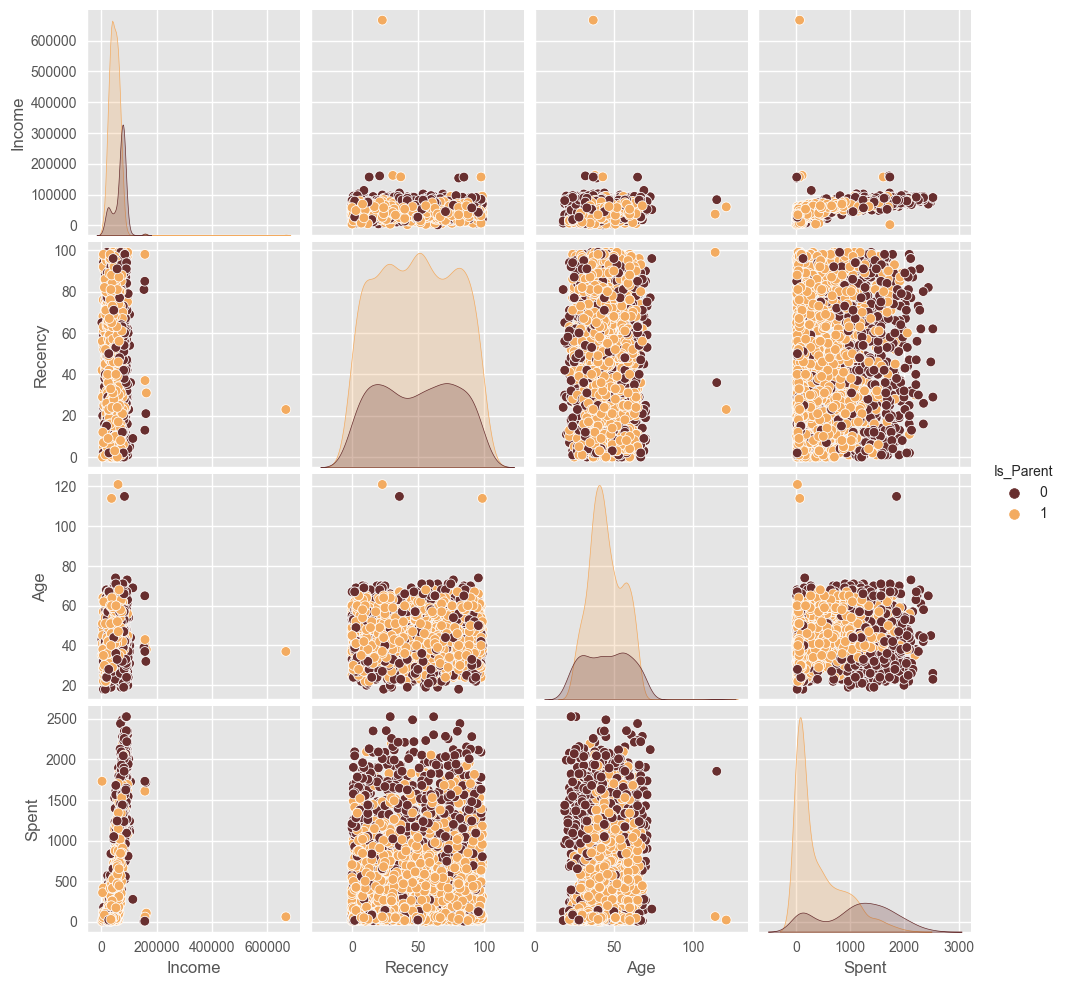

In [20]:
# Plotting following features
To_Plot = [ "Income", "Recency", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(customer_data[To_Plot], hue= "Is_Parent", palette= (["#682F2F","#F3AB60"]))
plt.show()

- The pair plot reveals outliers in **Income, Age, and Spent** features. 

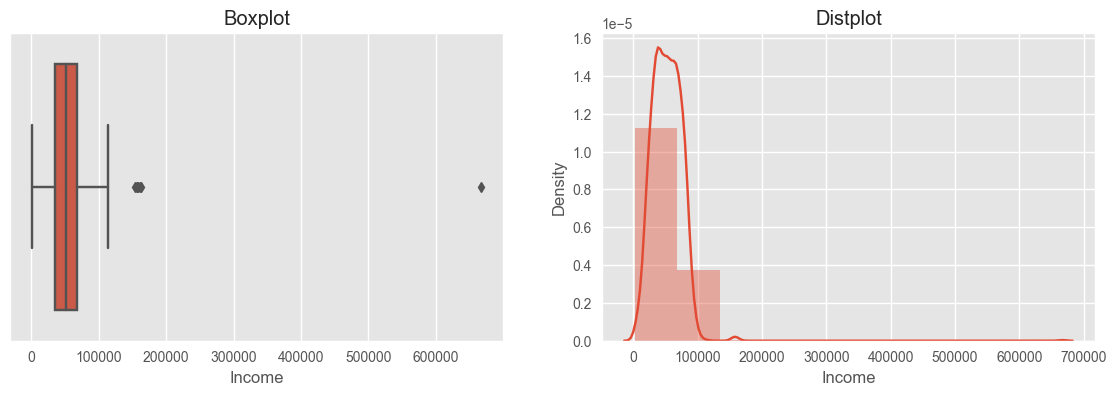

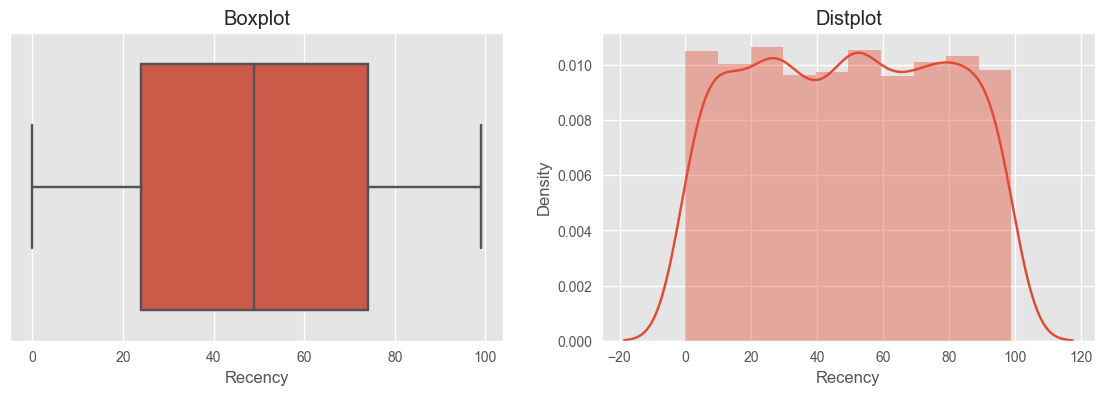

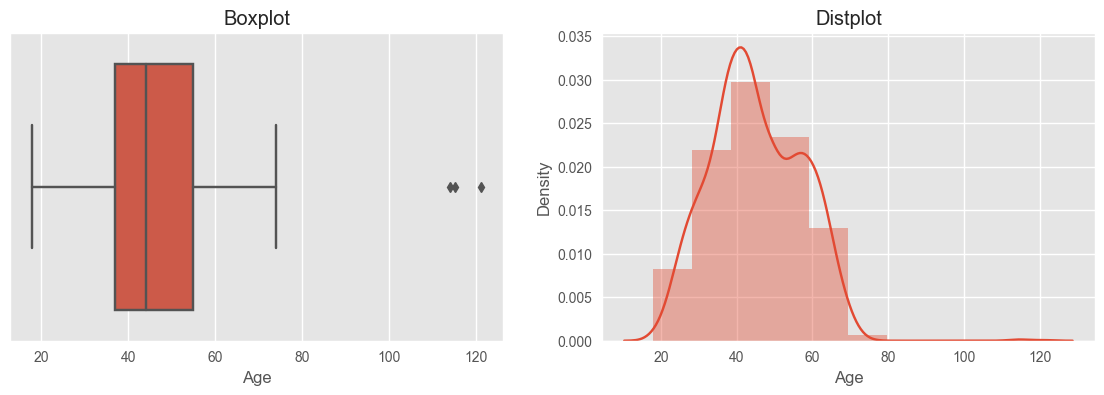

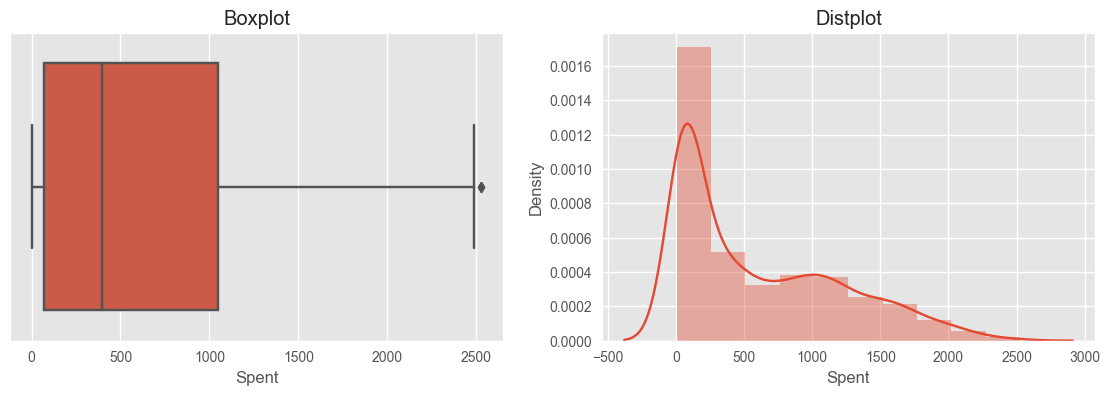

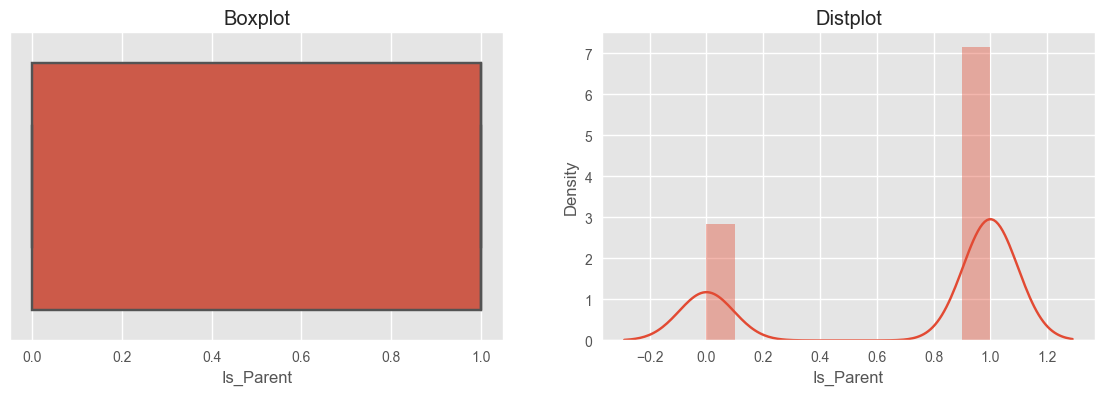

In [21]:
# boxplot
for col in To_Plot:
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))

    sns.boxplot(customer_data[col], ax=ax[0])
    ax[0].set_title('Boxplot')

    sns.distplot(customer_data[col], bins=10, kde=True, ax=ax[1])
    ax[1].set_title('Distplot')
    plt.show()

In [22]:
# function for get upper lower limit
def boundary_limit(data, col):
    
    # find Q1, Q2, and IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    print("IQR of " + col + " : ", IQR)
    
    # find the upper and lower boundaries
    upper_limit = Q3 + IQR * 1.5
    lower_limit = Q1 - IQR * 1.5

    print('Upper Limit of ' + col + ' : ', upper_limit)
    print('Lower Limit of ' + col + ' : ', lower_limit)
    
    print('Number of Outliers Records : ', (data[data[col] > upper_limit].shape[0] + data[data[col] < lower_limit].shape[0]))

In [23]:
for col in To_Plot:
    print('******* Boundary Limits of ' + col + ' ********')
    boundary_limit(customer_data, col)
    print(' ')

******* Boundary Limits of Income ********
IQR of Income :  32751.0
Upper Limit of Income :  117416.25
Lower Limit of Income :  -13587.75
Number of Outliers Records :  8
 
******* Boundary Limits of Recency ********
IQR of Recency :  50.0
Upper Limit of Recency :  149.0
Lower Limit of Recency :  -51.0
Number of Outliers Records :  0
 
******* Boundary Limits of Age ********
IQR of Age :  18.0
Upper Limit of Age :  82.0
Lower Limit of Age :  10.0
Number of Outliers Records :  3
 
******* Boundary Limits of Spent ********
IQR of Spent :  976.75
Upper Limit of Spent :  2510.625
Lower Limit of Spent :  -1396.375
Number of Outliers Records :  3
 
******* Boundary Limits of Is_Parent ********
IQR of Is_Parent :  1.0
Upper Limit of Is_Parent :  2.5
Lower Limit of Is_Parent :  -1.5
Number of Outliers Records :  0
 


#### Income 

In [24]:
# remove max value records of Income
customer_data = customer_data[~(customer_data['Income'] > 500000)]
customer_data.shape

(2239, 25)

In [25]:
# Impute outliers with upper limit
customer_data.loc[customer_data['Income'] > 117416.25, 'Income'] = 117416.25

#### Age

In [26]:
# remove outliers records of Age
customer_data = customer_data[~(customer_data['Age'] > 82.0)]
customer_data.shape

(2236, 25)

#### Spent 

In [27]:
# Impute outliers with upper limit
customer_data.loc[customer_data['Spent'] > 2510.625, 'Spent'] = 2510.625

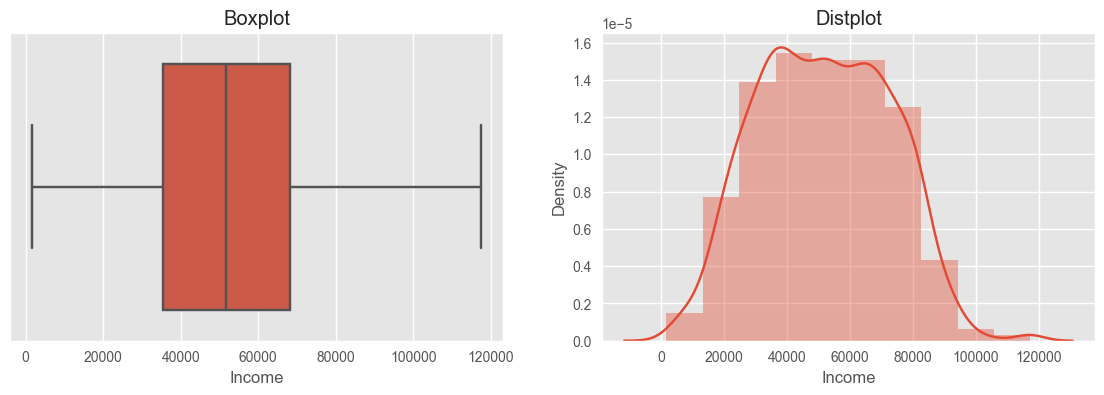

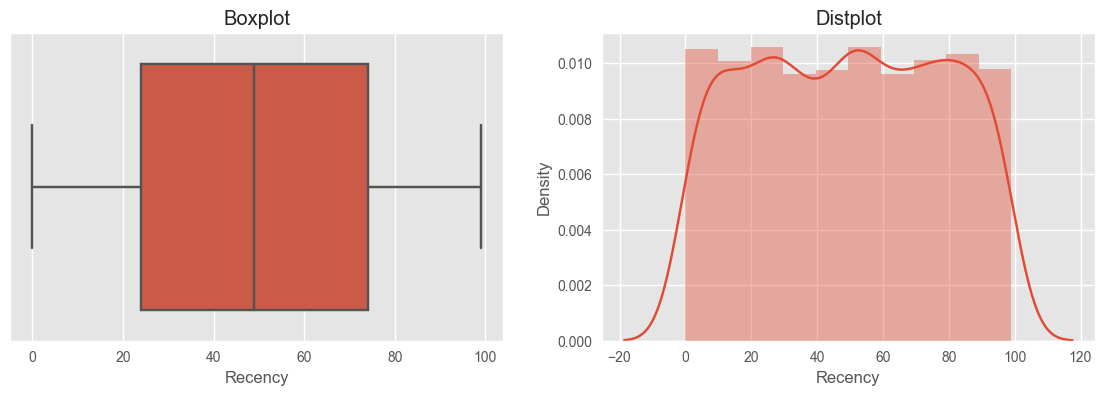

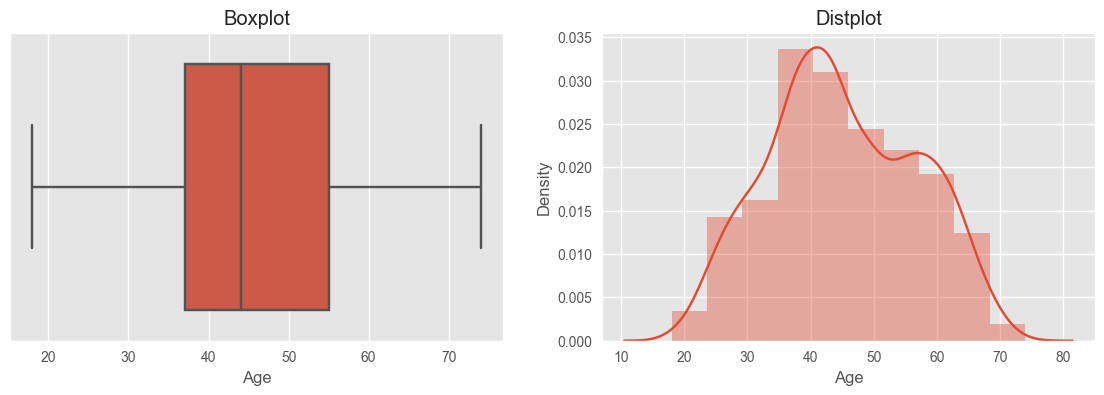

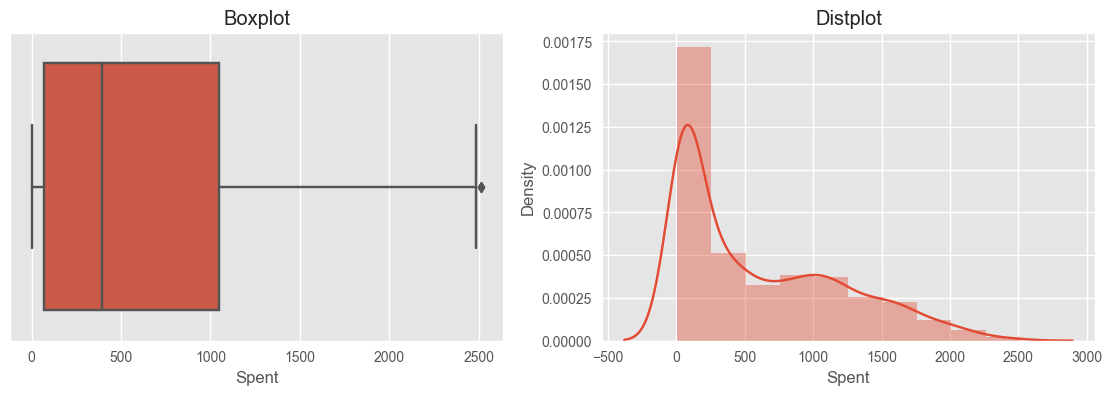

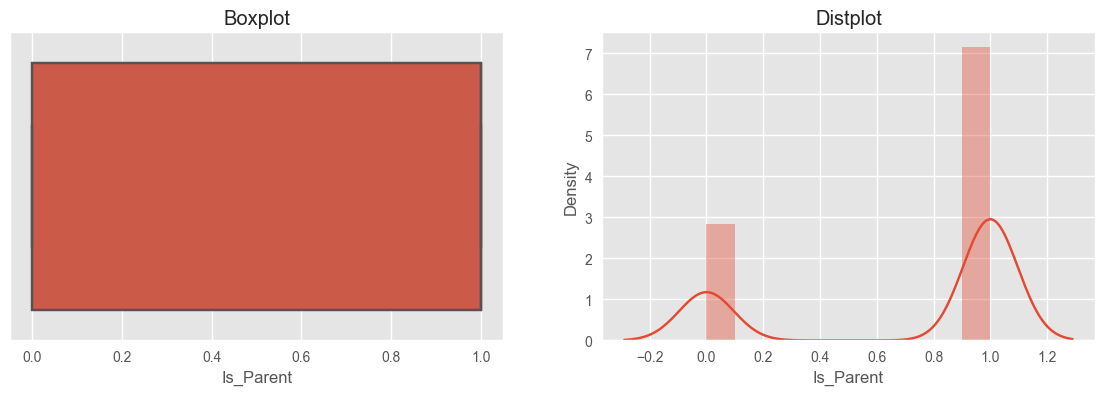

In [28]:
# boxplot
for col in To_Plot:
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))

    sns.boxplot(customer_data[col], ax=ax[0])
    ax[0].set_title('Boxplot')

    sns.distplot(customer_data[col], bins=10, kde=True, ax=ax[1])
    ax[1].set_title('Distplot')
    plt.show()

## 3. Exploratory Data Analysis - EDA

In [29]:
# Investigate all the elements whithin each Feature 
for column in customer_data:
    unique_vals = np.unique(customer_data[column])
    nr_values = len(unique_vals)
    if nr_values < 20:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Education :3 -- ['Graduate' 'Postgraduate' 'Undergraduate']
The number of values for feature Income :1965
The number of values for feature Kidhome :3 -- [0 1 2]
The number of values for feature Teenhome :3 -- [0 1 2]
The number of values for feature Recency :100
The number of values for feature Wines :775
The number of values for feature Fruits :158
The number of values for feature Meat :557
The number of values for feature Fish :182
The number of values for feature Sweets :177
The number of values for feature Gold :213
The number of values for feature NumDealsPurchases :15 -- [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15]
The number of values for feature NumWebPurchases :15 -- [ 0  1  2  3  4  5  6  7  8  9 10 11 23 25 27]
The number of values for feature NumCatalogPurchases :14 -- [ 0  1  2  3  4  5  6  7  8  9 10 11 22 28]
The number of values for feature NumStorePurchases :14 -- [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
The number of values for fe

In [30]:
# Separate categorical and numerical features
def extract_features(data):
    
    cat_features = data.select_dtypes(include=['object']).columns
    num_features = data.select_dtypes(exclude=['object']).columns

    return cat_features, num_features

In [31]:
categorical, numerical = extract_features(customer_data)
print('Number of Categorical Variables : ', len(categorical))
print('Categorical Variables : ', categorical)

print('Number of Numerical Variables : ', len(numerical))
print('Numerical Variables : ', numerical)

Number of Categorical Variables :  2
Categorical Variables :  Index(['Education', 'Living_With'], dtype='object')
Number of Numerical Variables :  23
Numerical Variables :  Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Spent', 'Children', 'Family_Size',
       'Is_Parent', 'Total_Promos'],
      dtype='object')


In [32]:
# get value counts of each categorical features
for col in categorical:
    print("****** Analysis of " + col + " *****")
    print('Value Counts')
    print(customer_data[col].value_counts())
    print("")
    
    print('Value Counts %')
    print((customer_data[col].value_counts() / len(customer_data[col])) * 100)
    print("")

****** Analysis of Education *****
Value Counts
Graduate         1126
Postgraduate      855
Undergraduate     255
Name: Education, dtype: int64

Value Counts %
Graduate         50.357782
Postgraduate     38.237925
Undergraduate    11.404293
Name: Education, dtype: float64

****** Analysis of Living_With *****
Value Counts
Partner    1442
Alone       794
Name: Living_With, dtype: int64

Value Counts %
Partner    64.490161
Alone      35.509839
Name: Living_With, dtype: float64



### 3.1. Histogram Plots

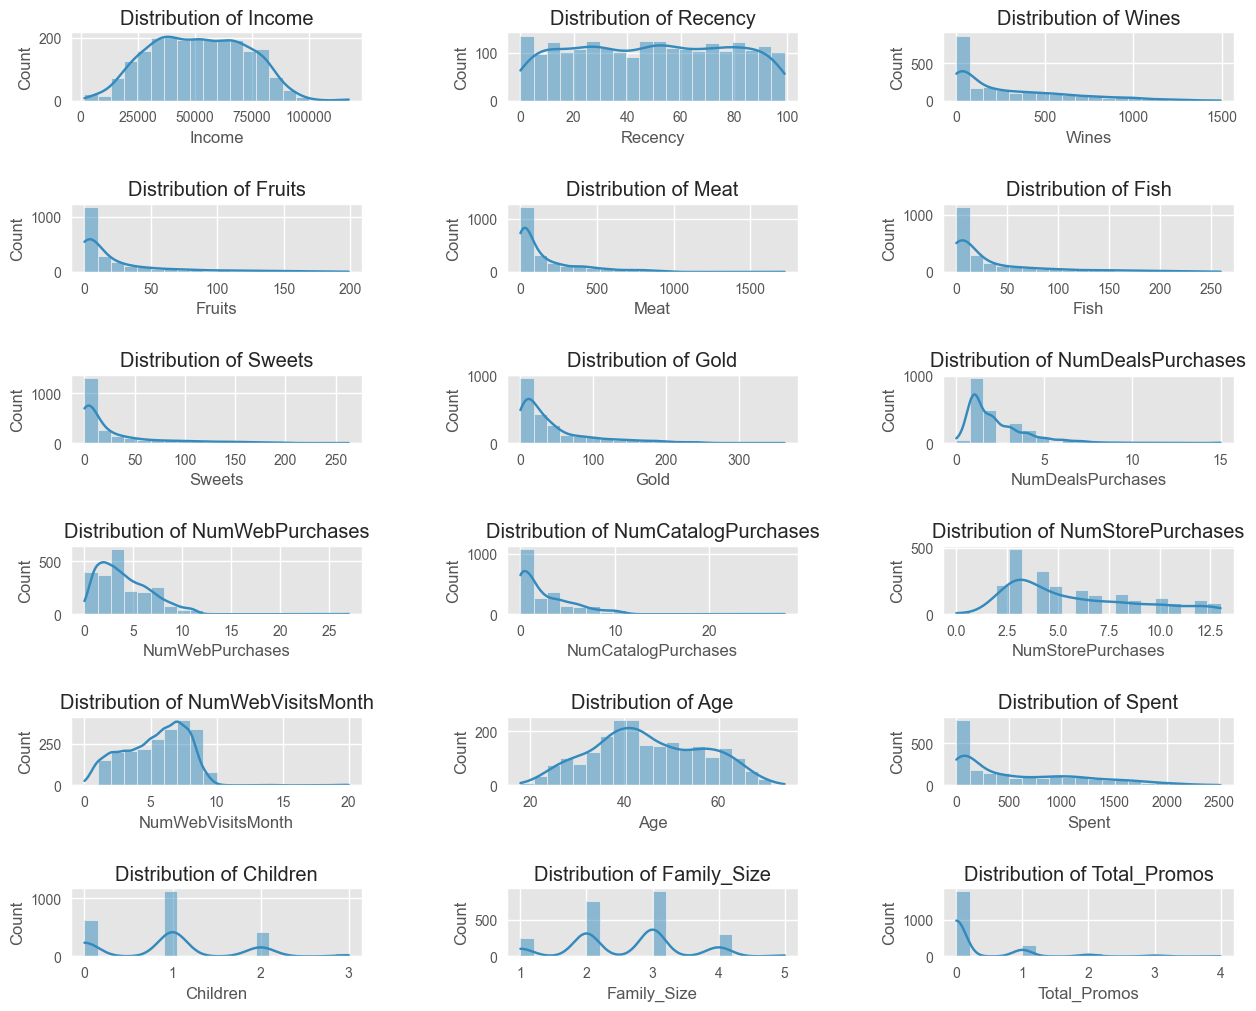

In [33]:
hist_cols = ['Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 
            'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
            'Age', 'Spent', 'Children', 'Family_Size', 'Total_Promos']
plt.figure(figsize = (15, 12))
plt.subplots_adjust(hspace = 1.5, wspace=0.5)

for i, col in enumerate(hist_cols):
    plt.subplot(6, 3, i+1)
    sns.histplot(customer_data, x = col, kde = True, bins = 20)
    plt.title("Distribution of " + col)
    
plt.show()

- The Histogram Plots reveal a **right-skewed distribution** for most features, with data points clustering towards lower values. However, exceptions are found in **'Income', 'Recency', 'Age', and 'Family_size'** features, which deviate from this trend.

### 3.2. Q-Q Plots

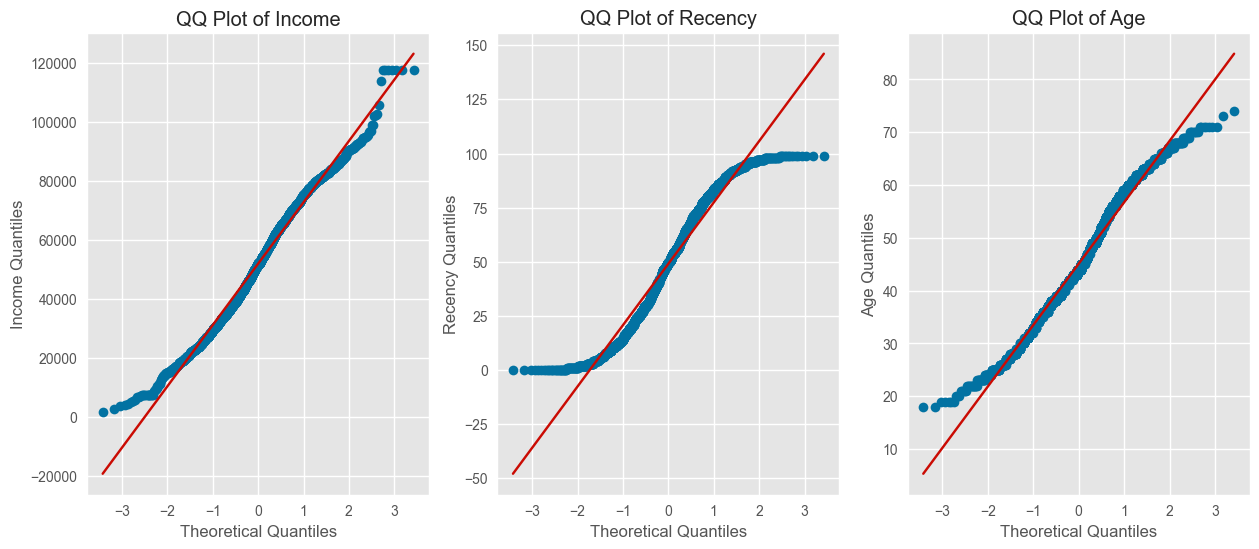

In [34]:
qq_income = customer_data['Income']
qq_recency = customer_data['Recency']
qq_age = customer_data['Age']
qq_data = [qq_income, qq_recency, qq_age]
qq_cols = ['Income', 'Recency', 'Age']

# Q-Q Plot 
plt.figure(figsize = (15, 6))
for i, col in enumerate(qq_cols):
    plt.subplot(1, 3, i+1)
    stats.probplot(qq_data[i], plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel(col + ' Quantiles')
    plt.title('QQ Plot of ' + col)

plt.show()

In [35]:
# Shapiro-Wilk Test
for i, col in enumerate(qq_cols):
    shapiro_test = stats.shapiro(qq_data[i])
    statistic, p_value = shapiro_test
    print('Shapiro-Wilk Test for ' + col)
    print(f"Shapiro-Wilk Test Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:.2f}")

    if p_value > 0.05:
        print("The data in " + col + "seems to be normally distributed.")
    else:
        print("The data in " + col + " might not be normally distributed.")
    print('')

Shapiro-Wilk Test for Income
Shapiro-Wilk Test Statistic: 0.9875
p-value: 0.00
The data in Income might not be normally distributed.

Shapiro-Wilk Test for Recency
Shapiro-Wilk Test Statistic: 0.9540
p-value: 0.00
The data in Recency might not be normally distributed.

Shapiro-Wilk Test for Age
Shapiro-Wilk Test Statistic: 0.9833
p-value: 0.00
The data in Age might not be normally distributed.



### 3.3. Bar Plots

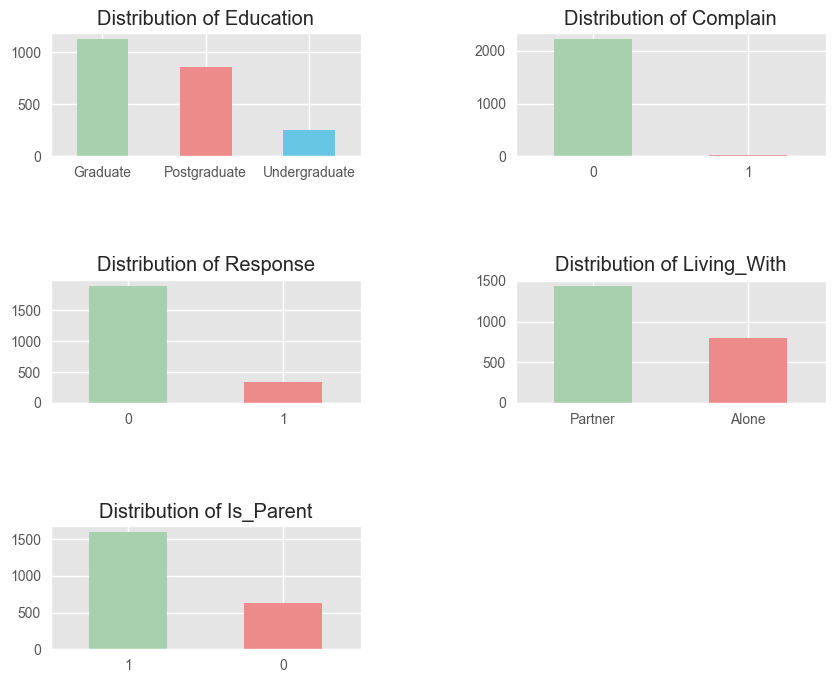

In [36]:
bar_cols = ["Education", "Complain", "Response", 
           "Living_With", "Is_Parent"]

plt.figure(figsize = (10, 8))
plt.subplots_adjust(hspace = 1, wspace=0.5)

for i, col in enumerate(bar_cols):
    plt.subplot(3, 2, i+1)
    customer_data[col].value_counts().plot(kind = 'bar', 
                                           color = ['#a7d1ae', '#ed8a8a', "#67C6E3"], 
                                           rot = 0)
    plt.title("Distribution of " + col)
plt.show()

### 3.4. Spent vs Age

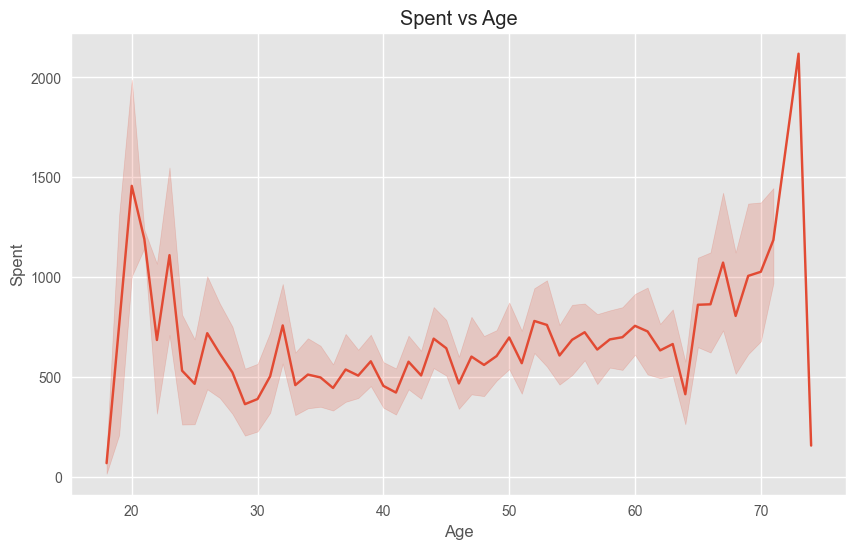

Correlation between Age and Spent: 0.11368557258235872


In [37]:
plt.figure(figsize = (10, 6))
sns.lineplot(data=customer_data, x = 'Age', y = 'Spent')
plt.title("Spent vs Age")
plt.show()
print(f"Correlation between Age and Spent: {customer_data['Age'].corr(customer_data['Spent'])}")

- The **'Spent' vs 'Age'** line plot shows a positive trend as customers' age increases, with a weak positive correlation score of **0.114**.

### 3.5. Spent vs Income

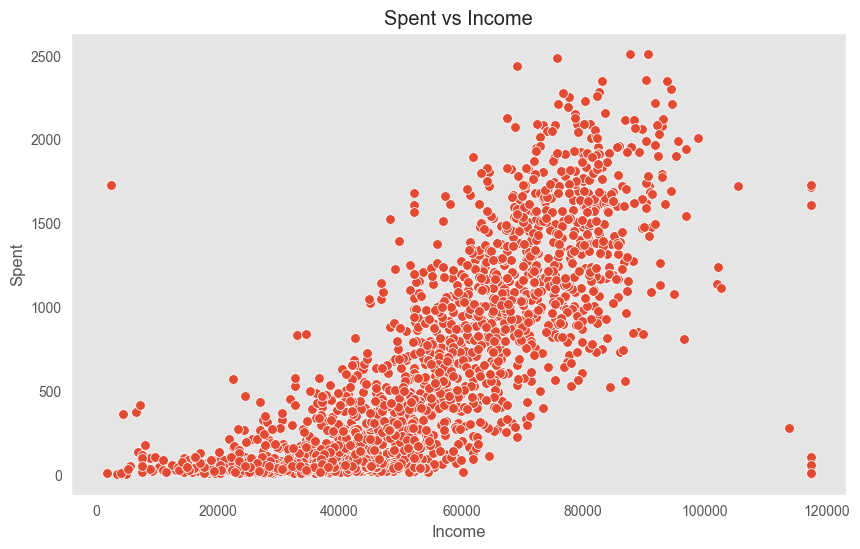

Correlation between Income and Spent: 0.8073052843530084


In [38]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data=customer_data, x = 'Income', y = 'Spent')
plt.title("Spent vs Income")
plt.grid(False)
plt.show()
print(f"Correlation between Income and Spent: {customer_data['Income'].corr(customer_data['Spent'])}")

- The scatter plot shows a **strong positive** correlation between **income and spending** patterns, with a correlation coefficient of **0.807** confirming a significant and **positive linear relation** between income and spending patterns.

## 4. Handling with Categorical Features

In [39]:
# back up the data
customer_encoded = customer_data.copy()
customer_encoded.shape

(2236, 25)

In [40]:
# Convert to numerical using LabelEncoder
le = LabelEncoder()

for i in categorical:
    customer_encoded[i] = customer_encoded[[i]].apply(le.fit_transform)

customer_encoded.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      88    88                  3                8                   10   
1       1     6                  2                1                    1   
2      21    42                  1                8                    2   
3       3     5                  2                2                    0   
4      27    15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  Complain  Response  Age   Spent  \
0                  4                  7         0         1   57  1617.0   
1                  2                  5         0         0   60    27.0   
2                 10                  4         0         0   49   776.0   
3                  4                  6         0         0   30    53.0   
4                  6                  5         0         0   33   422.0   

   Living_With  Children  Family_Size  Is_Parent  Total_Promos  
0            0         0            1          0             0  
1            0         2            3          1             0  
2            1         0            2          0             0  
3            1         1            3          1             0  
4            1         1            3          1             0

## 5. Correlation Heatmap

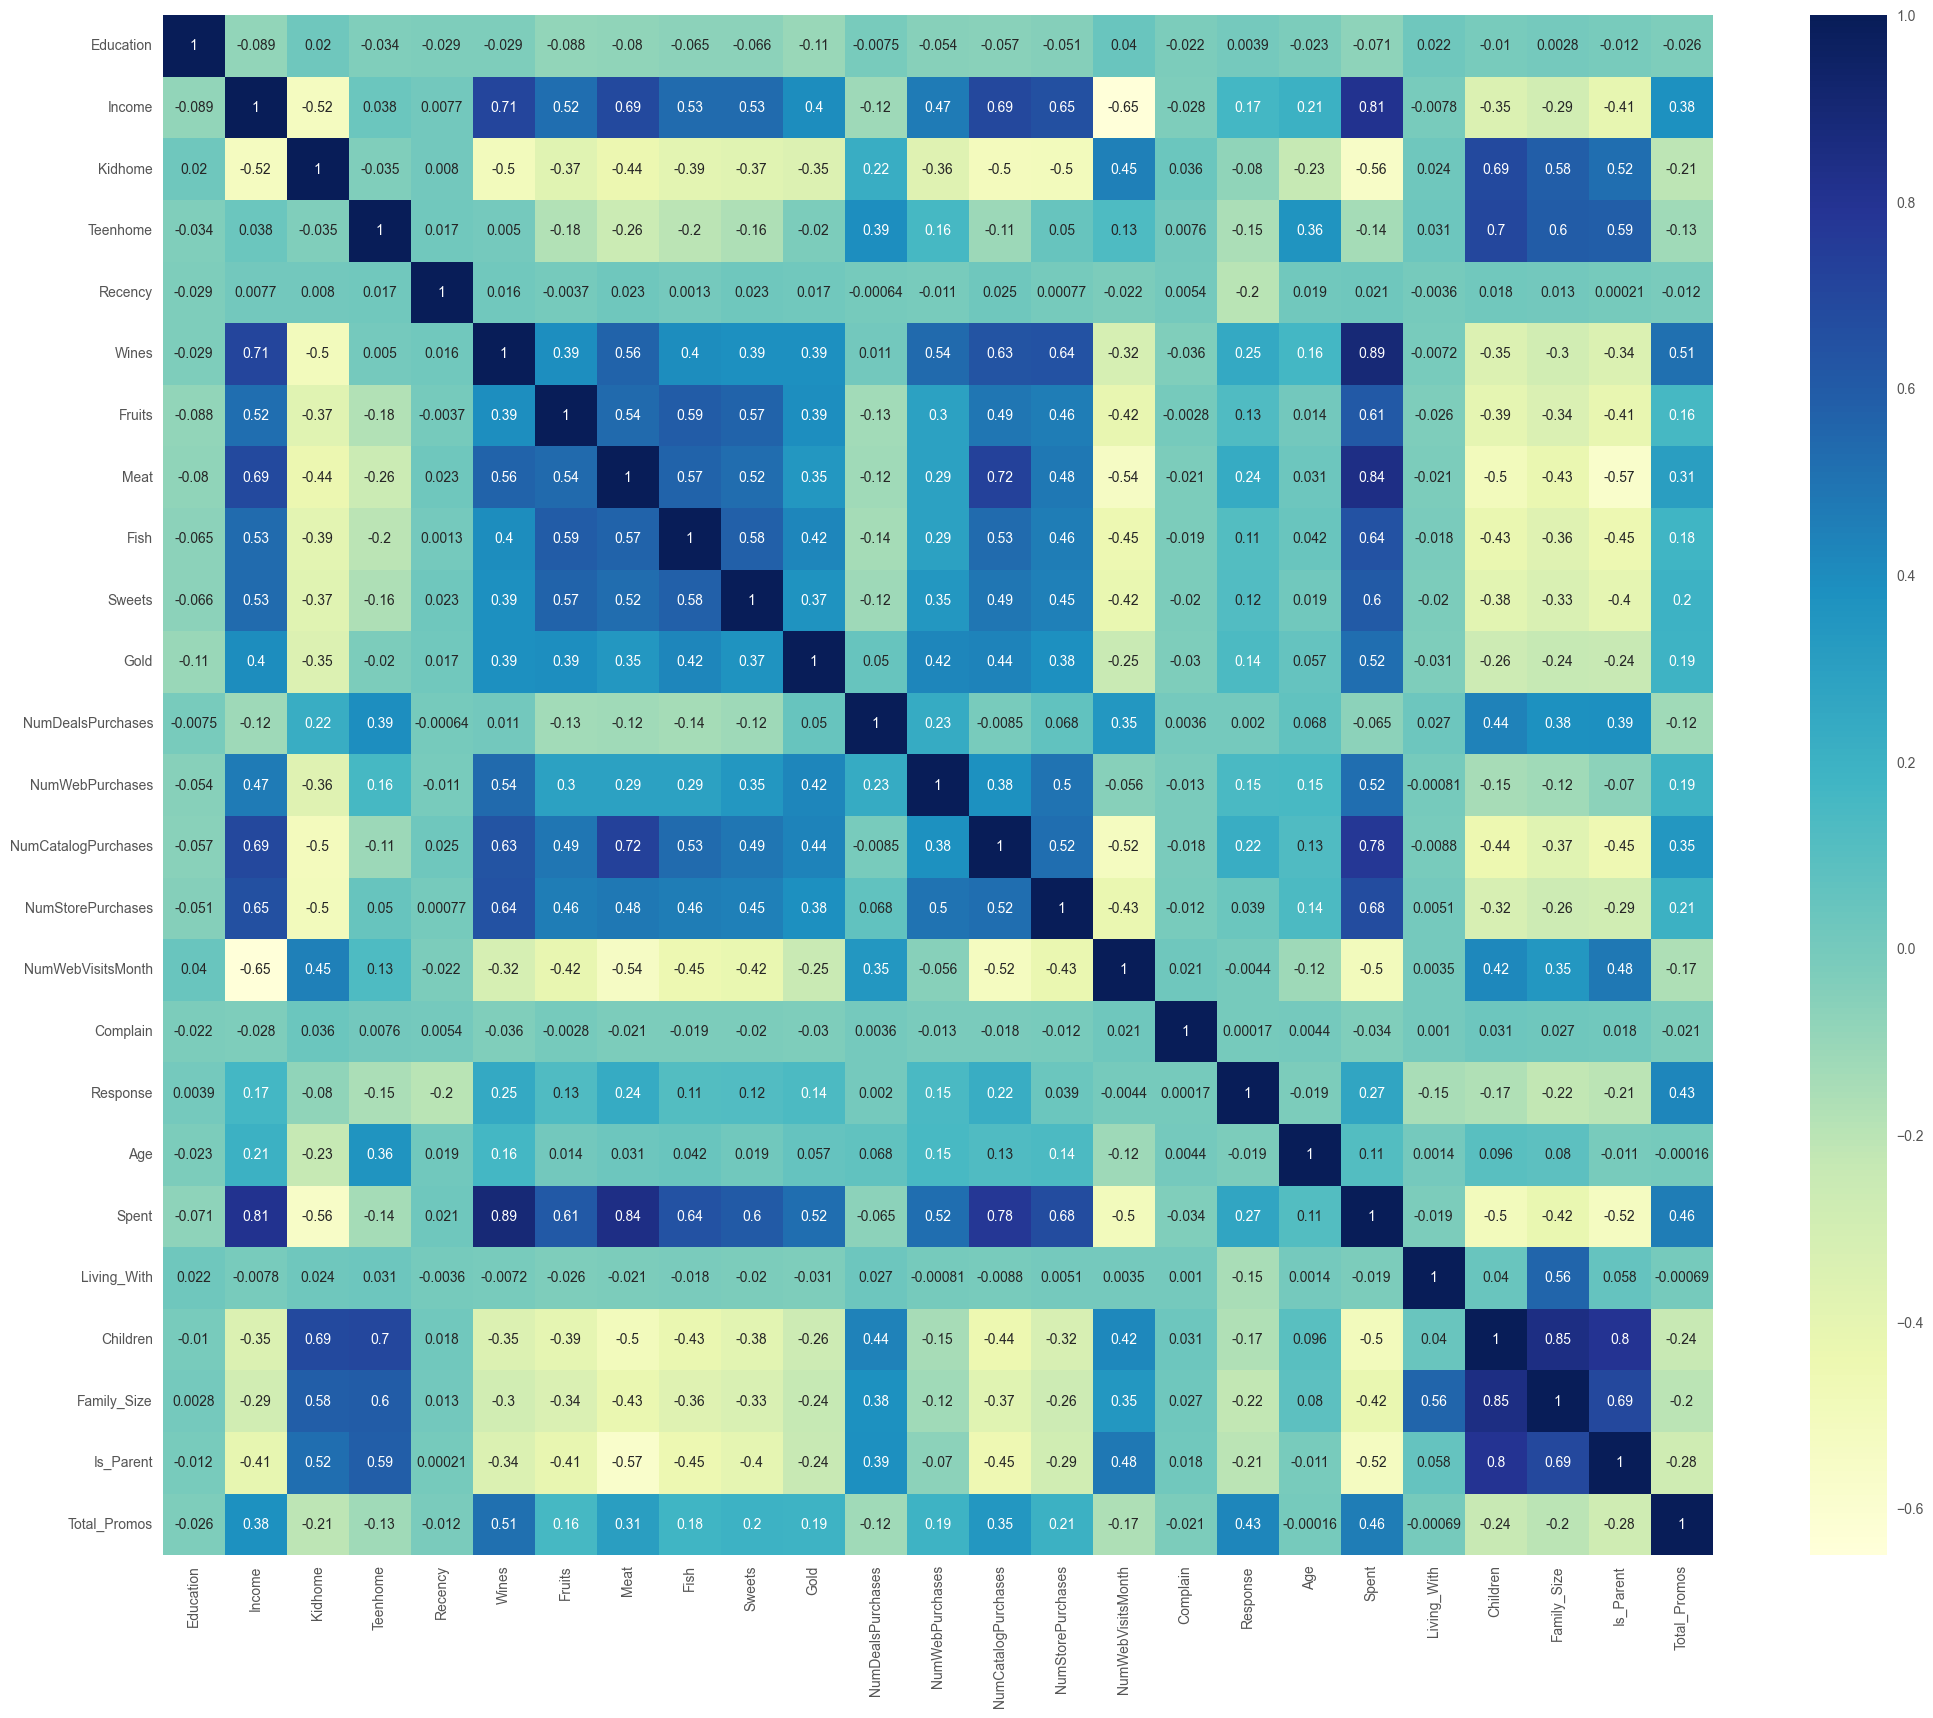

In [41]:
# Finds correlation using heatmap
plt.figure(figsize = (25, 20))
sns.heatmap(customer_encoded.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [42]:
# identify more correlated feature 
def cor_feature(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# call the function with 0.8 threshold
cor_feature(customer_encoded, 0.8)

{'Family_Size', 'Spent'}

## 6. Scaling data

In [43]:
# Scaling
scaler = StandardScaler()
scaler.fit(customer_encoded)
scaled_data = pd.DataFrame(scaler.transform(customer_encoded),
                           columns = customer_encoded.columns)
scaled_data.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0   -0.89438  0.301730 -0.824939 -0.930615  0.306856  0.983228  1.554170   
1   -0.89438 -0.262840  1.032627  0.905974 -0.383971 -0.871064 -0.636431   
2   -0.89438  0.946769 -0.824939 -0.930615 -0.798467  0.362159  0.572177   
3   -0.89438 -1.205768  1.032627 -0.930615 -0.798467 -0.871064 -0.560893   
4    0.57070  0.309150  1.032627 -0.930615  1.550344 -0.389661  0.421101   

       Meat      Fish    Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
0  1.679746  2.461068  1.475396  0.845669           0.348738         1.407639   
1 -0.713455 -0.650414 -0.631638 -0.729742          -0.168700        -1.110921   
2 -0.177201  1.344595 -0.147262 -0.038098          -0.686137         1.407639   
3 -0.651409 -0.503991 -0.583200 -0.748954          -0.168700        -0.751127   
4 -0.217088  0.154911 -0.001950 -0.556831           1.383614         0.328256   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0             2.509801          -0.552429           0.692865 -0.095001   
1            -0.568970          -1.167738          -0.131421 -0.095001   
2            -0.226884           1.293496          -0.543564 -0.095001   
3            -0.911056          -0.552429           0.280722 -0.095001   
4             0.115201           0.062879          -0.131421 -0.095001   

   Response       Age     Spent  Living_With  Children  Family_Size  \
0  2.386338  1.016868  1.680375    -1.347635 -1.264308    -1.758810   
1 -0.419052  1.273264 -0.962267    -1.347635  1.395139     0.445618   
2 -0.419052  0.333146  0.282600     0.742041 -1.264308    -0.656596   
3 -0.419052 -1.290693 -0.919054     0.742041  0.065416     0.445618   
4 -0.419052 -1.034298 -0.305762     0.742041  0.065416     0.445618   

   Is_Parent  Total_Promos  
0  -1.584362     -0.438933  
1   0.631169     -0.438933  
2  -1.584362     -0.438933  
3   0.631169     -0.438933  
4   0.631169     -0.438933

## 7. Dimensionality Reduction
### 7.1. Perform PCA

In [44]:
# Applying PCA
pca = PCA(n_components = 4)
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.33999569, 0.11582337, 0.06188532, 0.05238873])

In [45]:
PCA_ds = pd.DataFrame(pca.transform(scaled_data), 
                      columns=(["col1", "col2", "col3", "col4"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2236.0  3.420043e-16  2.916110 -5.944599 -2.545897 -0.829845  2.344917   
col2  2236.0  4.627584e-17  1.702022 -4.290000 -1.336218 -0.129652  1.249326   
col3  2236.0 -6.583881e-17  1.244127 -2.859047 -0.827770 -0.179356  0.502393   
col4  2236.0  3.758671e-17  1.144704 -3.297079 -0.767622  0.000347  0.920284   

           max  
col1  8.088149  
col2  5.981152  
col3  4.932842  
col4  3.417409

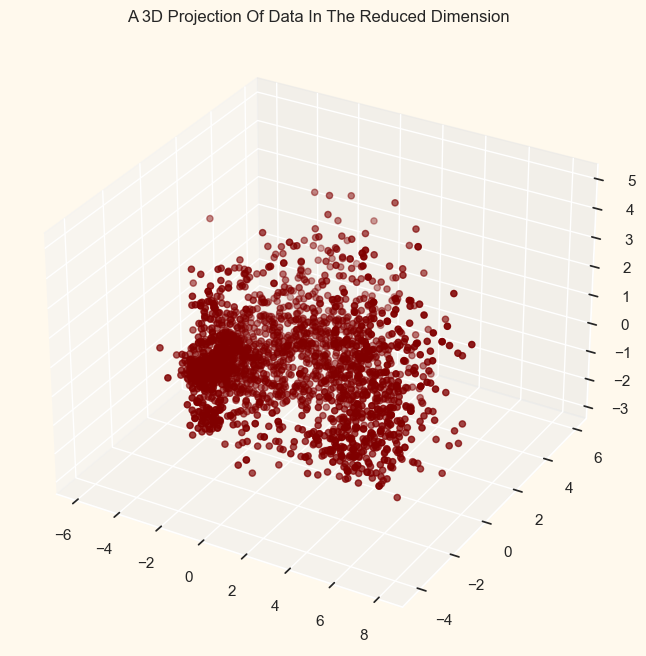

In [46]:
# A 3D Projection Of Data In The Reduced Dimension
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

# Setting up colors prefrences
sns.set(rc={"axes.facecolor": "#FFF9ED", 
            "figure.facecolor": "#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [47]:
# backup of data
data_agg = scaled_data.copy()
print(data_agg.shape)

data_kmeans = scaled_data.copy()
print(data_kmeans.shape)

(2236, 25)
(2236, 25)


## 8. Clustering
### 8.1. Agglomerative clustering

Elbow Method to determine the number of clusters to be formed:


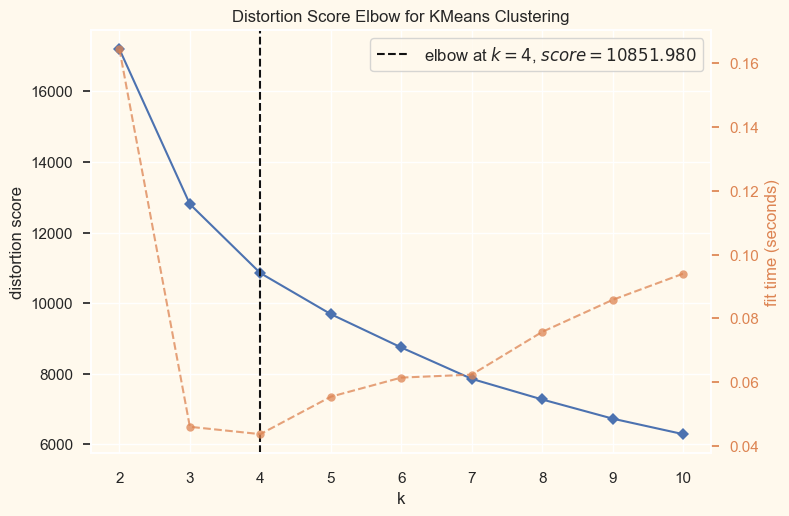

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

- Based on the findings from the preceding analysis, it's determined that **four clusters** would be optimal for grouping the data effectively. To proceed, we'll employ the Agglomerative Clustering Model to finalize these clusters.

In [49]:
# Initiating the Agglomerative Clustering model 
agg = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = agg.fit_predict(PCA_ds)
PCA_ds["Clusters_agg"] = yhat_AC

# Adding the Clusters feature to the orignal dataframe.
customer_data["Clusters_agg"]= yhat_AC
customer_encoded["Clusters_agg"]= yhat_AC

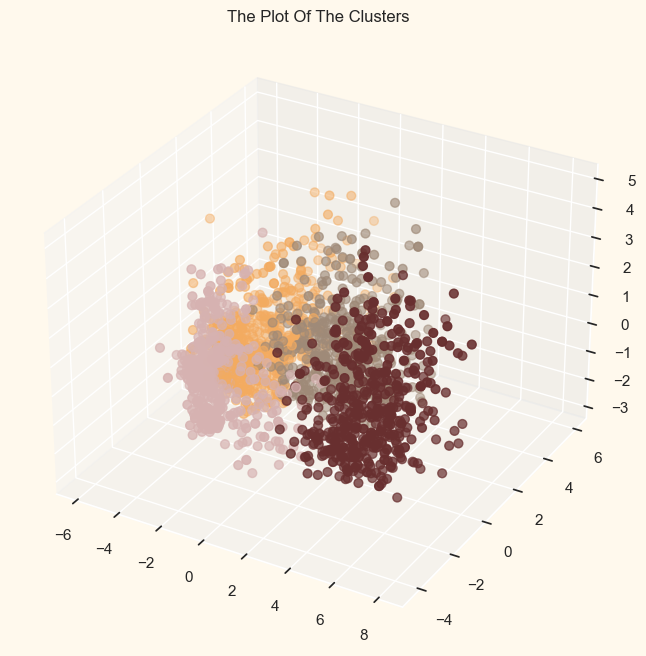

In [50]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", 
                              "#B9C0C9", "#9F8A78", "#F3AB60"])

# Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters_agg"], 
           marker='o', cmap = cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

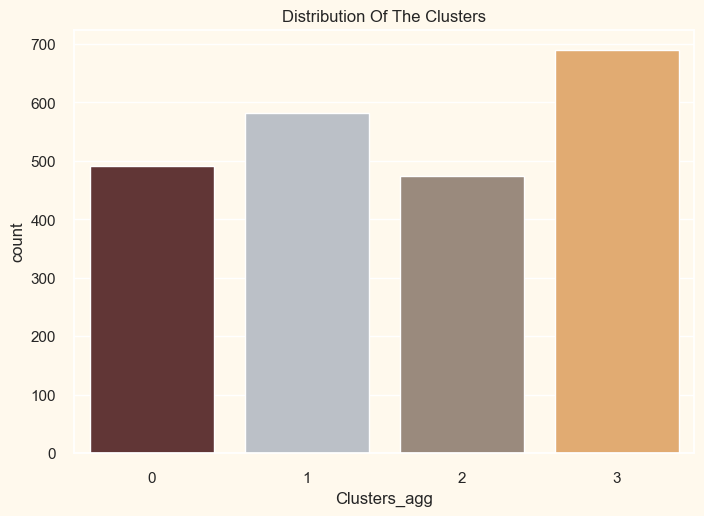

In [51]:
# Plotting countplot of clusters
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
pl = sns.countplot(x=customer_encoded["Clusters_agg"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

- The clusters appear to be evenly dispersed across the dataset. This indicates that the data points within each cluster are well-distributed and balanced, without significant concentration in any particular region.

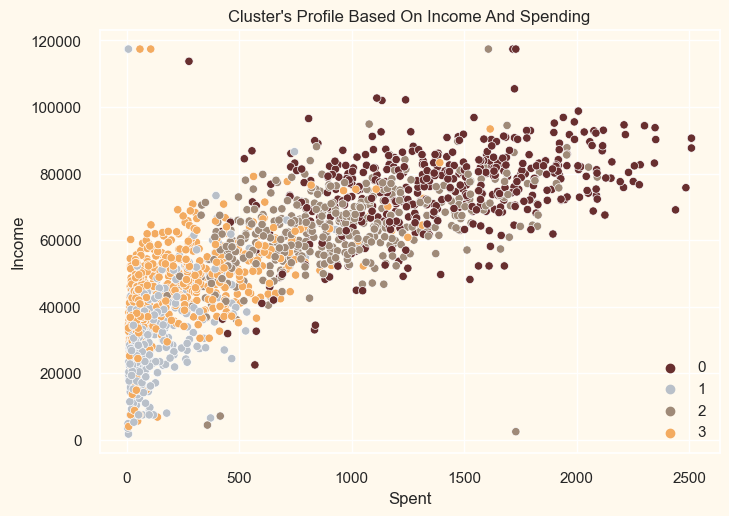

In [52]:
pl = sns.scatterplot(data = customer_encoded, 
                     x=customer_encoded["Spent"], 
                     y=customer_encoded["Income"],
                     hue=customer_encoded["Clusters_agg"], 
                     palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

The income versus spending plot reveals distinct clusters within the data. 
1.	**Group 0:** Characterized by high spending and high income.
2.	**Group 1:** Represents individuals with low spending and low income.
3.	**Group 2:** Comprises individuals with average spending and average income.
4.	**Group 3:** This group exhibits low spending and average income. 

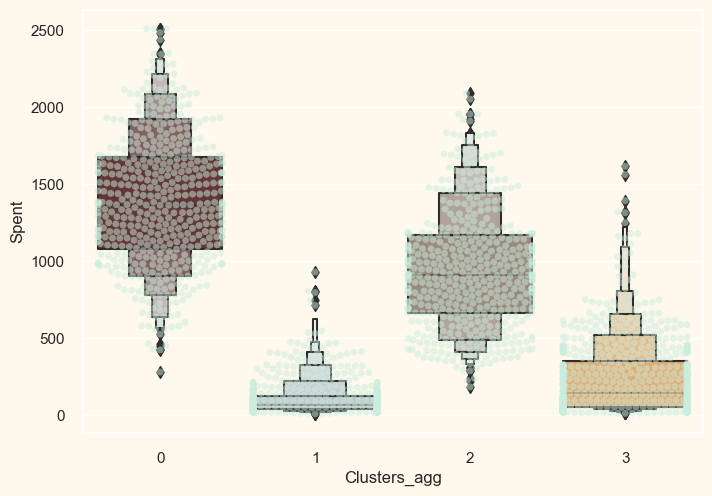

In [53]:
plt.figure()
pl=sns.swarmplot(x=customer_encoded["Clusters_agg"], 
                 y=customer_encoded["Spent"], 
                 color= "#CBEDDD", 
                 alpha=0.5 )
pl=sns.boxenplot(x=customer_encoded["Clusters_agg"], 
                 y=customer_encoded["Spent"], 
                 palette=pal)
plt.show()

- The plot above provides a visual representation indicating that **cluster 0** comprises the largest group of customers, closely followed by **cluster 2.**

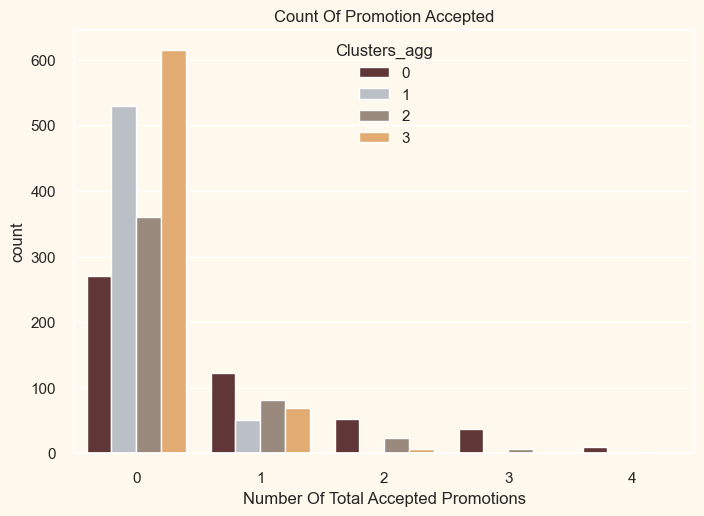

In [54]:
# Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=customer_encoded["Total_Promos"],
                   hue=customer_encoded["Clusters_agg"], 
                   palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

- The campaigns have not generated significant responses, with limited participation and no engagement with all five campaigns, indicating a need for more targeted and meticulously planned campaigns.

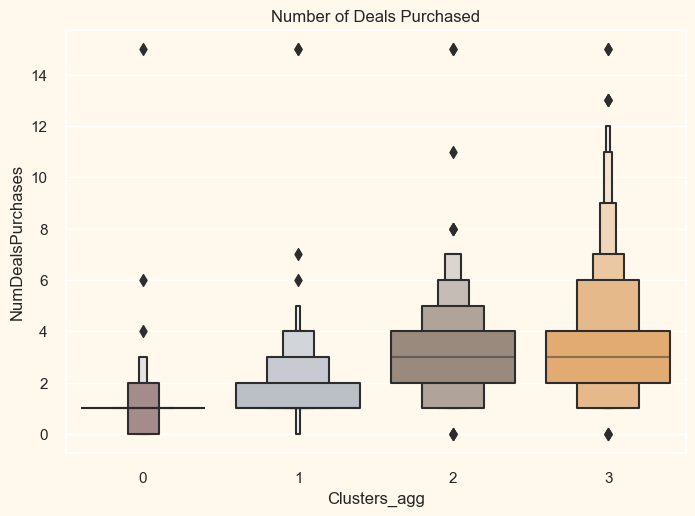

In [55]:
# Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=customer_encoded["NumDealsPurchases"],
                 x=customer_encoded["Clusters_agg"], 
                 palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

- The deals have shown promising outcomes. It has the best outcome with **Cluster 3 and Cluster 2**. However, our star customers **Cluster 0** are not much into the deals. Nothing seems to attract **Cluster 1** overwhelmingly.

<Figure size 800x550 with 0 Axes>

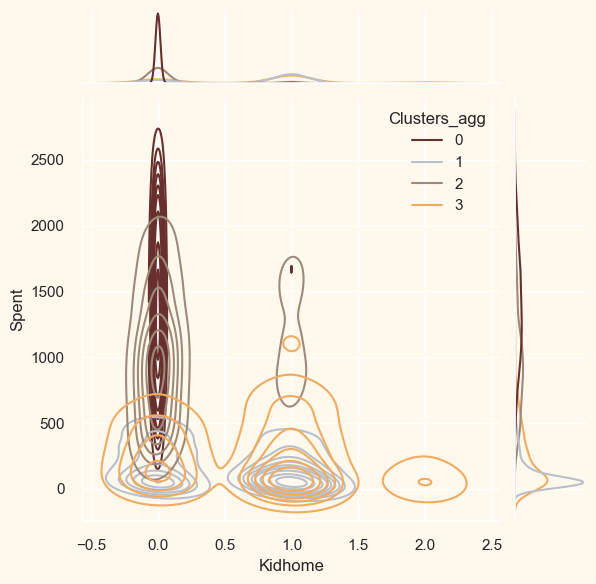

<Figure size 800x550 with 0 Axes>

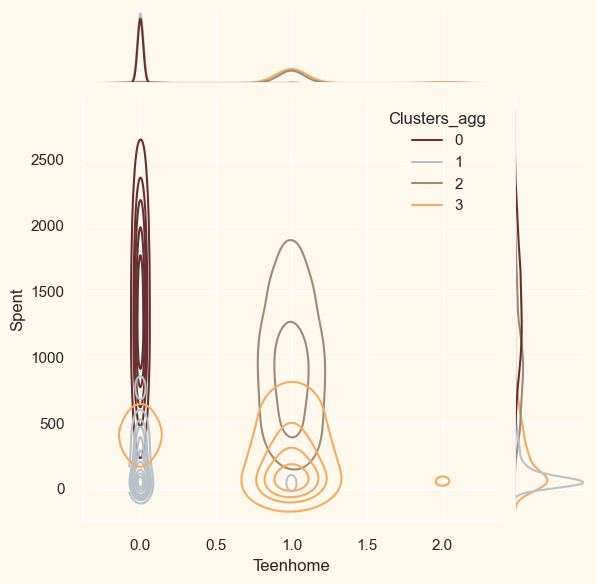

<Figure size 800x550 with 0 Axes>

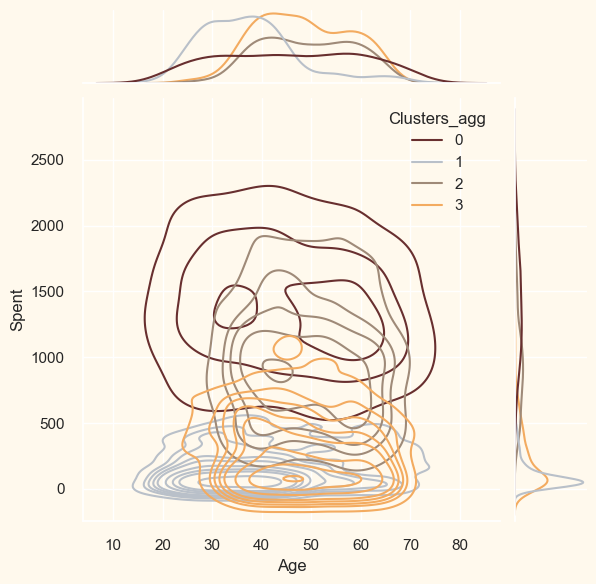

<Figure size 800x550 with 0 Axes>

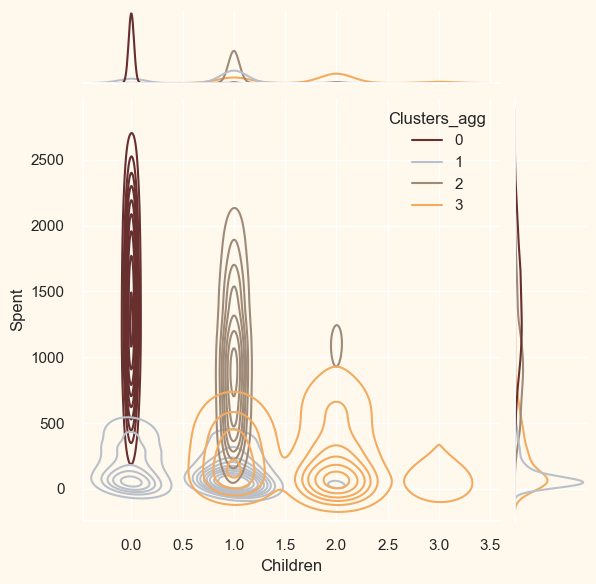

<Figure size 800x550 with 0 Axes>

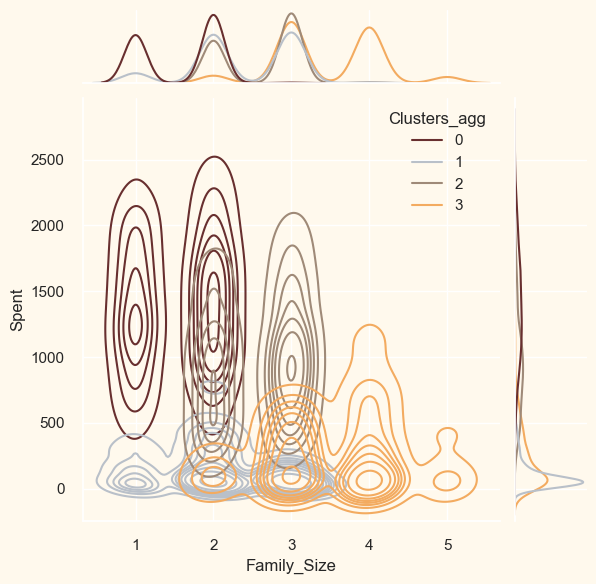

<Figure size 800x550 with 0 Axes>

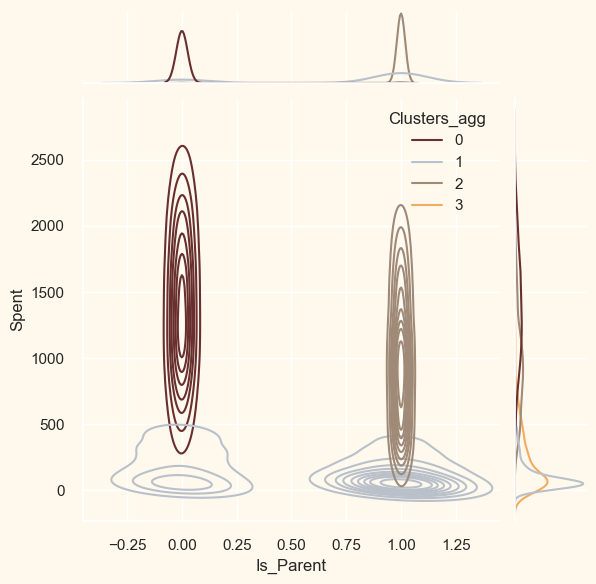

<Figure size 800x550 with 0 Axes>

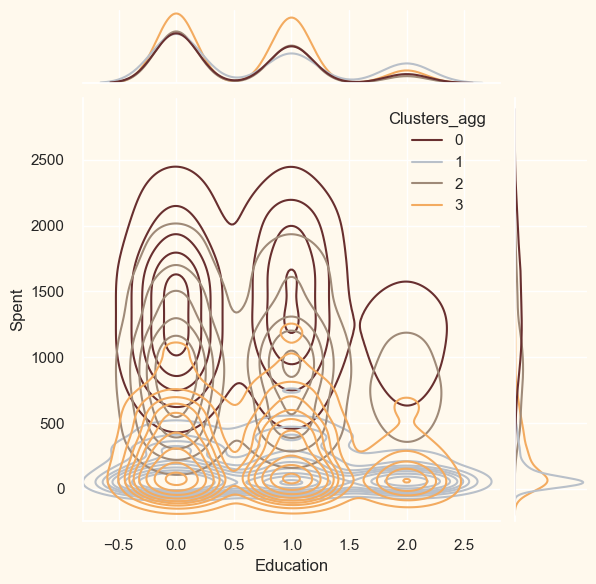

<Figure size 800x550 with 0 Axes>

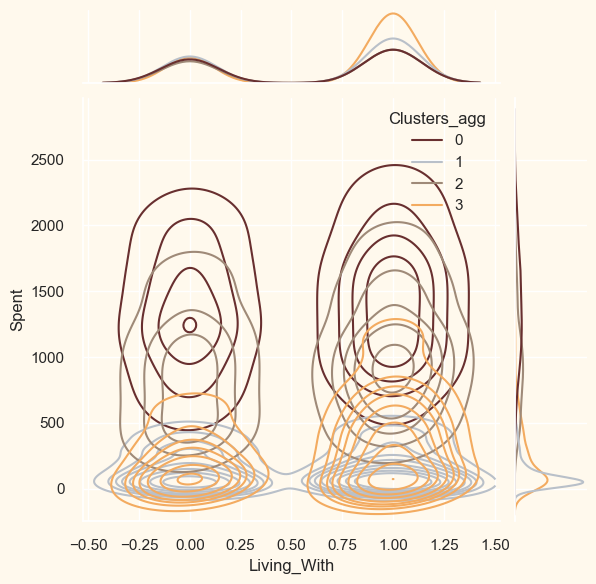

In [56]:
profile = ["Kidhome", "Teenhome", "Age", "Children", 
            'Family_Size', "Is_Parent", "Education", "Living_With"]

for i in profile:
    plt.figure()
    sns.jointplot(x=customer_encoded[i], 
                  y=customer_encoded["Spent"], 
                  hue=customer_encoded["Clusters_agg"], 
                  kind="kde", 
                  palette=pal)
    plt.show()

#### Conclusion from Agglomorative Clustering
1. Cluster 0:
    - They are not parents, and they don’t have children.
    - Approximately 15 to 75 aged people.
    - The family has 1 or 2 members.
    - High income and high spending group.


2. Cluster 1:
    - The majority of these people are parents.
    - At the max have 3 members in the family and at least 1.
    - Span all ages.
    - Some have one kid, and some do not have any kids at home.
    - The majority have only one child at home.
    - Low-income and low-spending groups.


3. Cluster 2:
    - They are parents.
    - At the max have 4 members in the family and at least 2.
    - Approximately 30 to 70 aged people.
    - The majority have a child at home.
    - Average income and average spending group.


4. Cluster 3:
    - The majority of these people are parents.
    - Approximately 25 to 70 aged people.
    - At the max have 5 members in the family and at least 2. (5 family members fall into this Cluster).
    - Some have one or two kids, and some do not have any kids at home.
    - The majority have two children at home.
    - Average income and low spending group.

### 8.2. K-Means Clustering

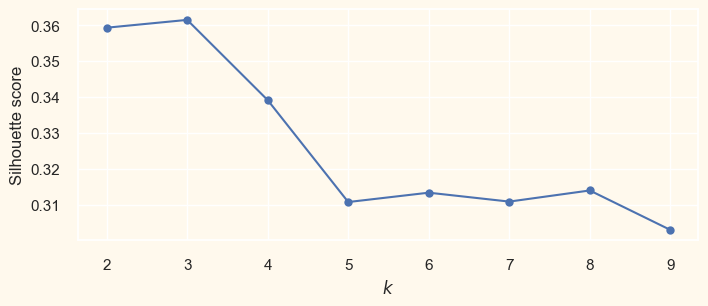

In [57]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(PCA_ds)
                for k in range(2, 11)]

silhouette_scores = [silhouette_score(PCA_ds, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid(True)
plt.show()

In [58]:
# Print Silhouette score for each cluster
cluster_range = range(2, 10)
for i, score in zip(cluster_range, silhouette_scores):
  print(f"Silhouette Score for {i} Clusters:", score)

Silhouette Score for 2 Clusters: 0.3593676571730205
Silhouette Score for 3 Clusters: 0.36154682319463866
Silhouette Score for 4 Clusters: 0.33915442606155627
Silhouette Score for 5 Clusters: 0.3107208287631005
Silhouette Score for 6 Clusters: 0.313329942764422
Silhouette Score for 7 Clusters: 0.3108428699178654
Silhouette Score for 8 Clusters: 0.3139495107626334
Silhouette Score for 9 Clusters: 0.3029476853128636


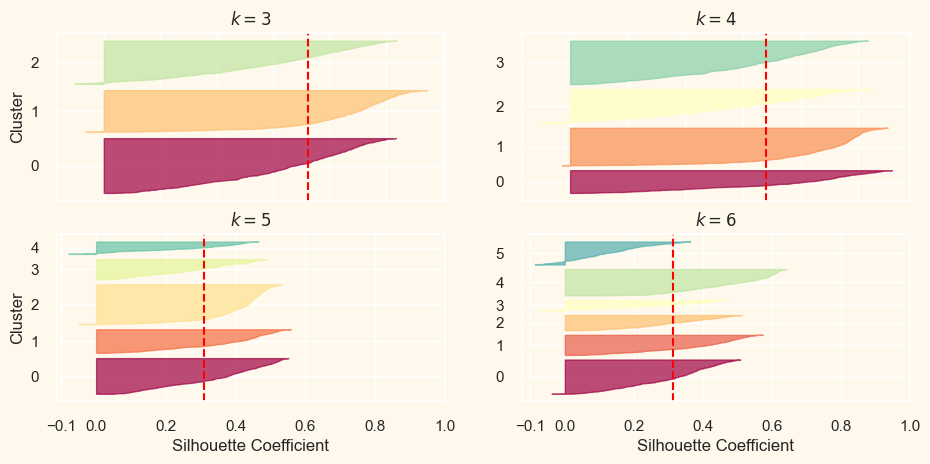

In [59]:
plt.figure(figsize=(11, 10))

for k in (3, 4, 5, 6):
    plt.subplot(4, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(PCA_ds, y_pred)

    padding = len(PCA_ds) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

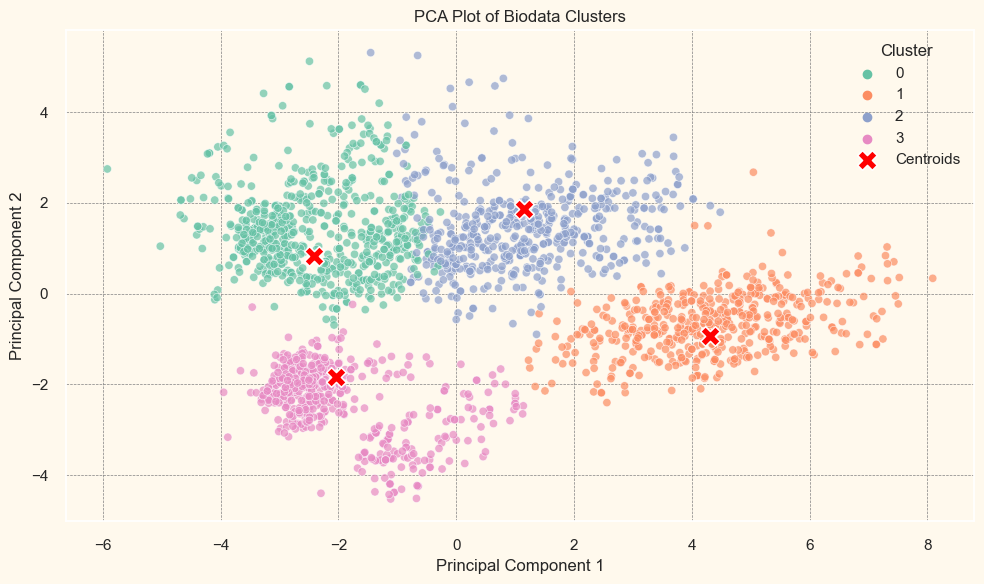

In [60]:
# Cluster Image
kmeans = KMeans(n_clusters= 4, random_state=42)  #change value of n_clusters
cluster_labels = kmeans.fit_predict(PCA_ds)
data_kmeans['Cluster'] = cluster_labels
new_data = data_kmeans.copy()

pca = PCA(n_components=3)
pca_data = pca.fit_transform(new_data)

new_data['PC1'] = pca_data[:, 0]
new_data['PC2'] = pca_data[:, 1]
new_data['PC3'] = pca_data[:, 2]
# new_data['PC4'] = pca_data[:, 3]

cluster_palette = sns.color_palette("Set2", n_colors = len(new_data['Cluster'].unique()))

plt.figure(figsize = (10, 6))
sns.scatterplot(data=new_data, x = 'PC1', y = 'PC2', hue = 'Cluster', 
                palette = cluster_palette, alpha = 0.7)
plt.title("PCA Plot of Biodata Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()

plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
sns.scatterplot(x = kmeans.cluster_centers_[:,0], 
                y = kmeans.cluster_centers_[:,1], 
                marker = 'X', 
                s = 200, 
                color = 'red', 
                label = 'Centroids')
plt.legend(title = 'Cluster')
plt.show()

In [61]:
# apply kmeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(PCA_ds)

customer_data['Cluster_km'] = cluster_labels
customer_encoded['Cluster_km'] = cluster_labels

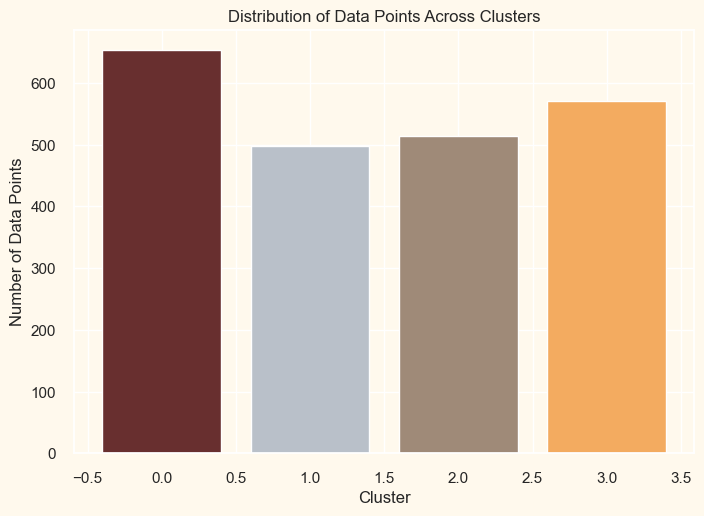

In [62]:
cluster_distribution = customer_encoded['Cluster_km'].value_counts().sort_index()

plt.bar(cluster_distribution.index, cluster_distribution.values, color=pal)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.show()

- The dataset shows evenly distributed clusters, indicating well-distributed and balanced data points within each cluster without significant concentration in any particular region.

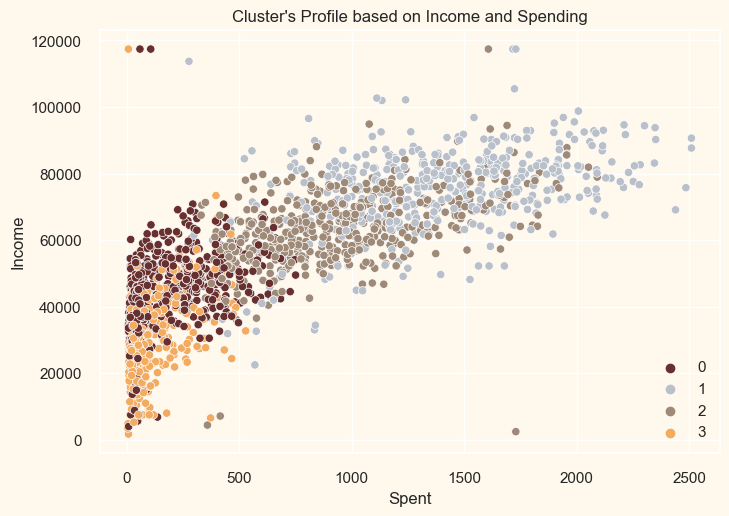

In [63]:
sns.scatterplot(data=customer_encoded, x = 'Spent', 
                y = 'Income', hue = 'Cluster_km', palette=pal)
plt.title("Cluster's Profile based on Income and Spending")
plt.legend()
plt.show()

The income versus spending plot reveals distinct clusters within the data. 
1.	**Group 0:** Characterized by low spending and low income.
2.	**Group 1:** Represents individuals with high spending and high income.
3.	**Group 2:** Comprises individuals with low spending and low income.
4.	**Group 3:** This group exhibits average spending and low income. 

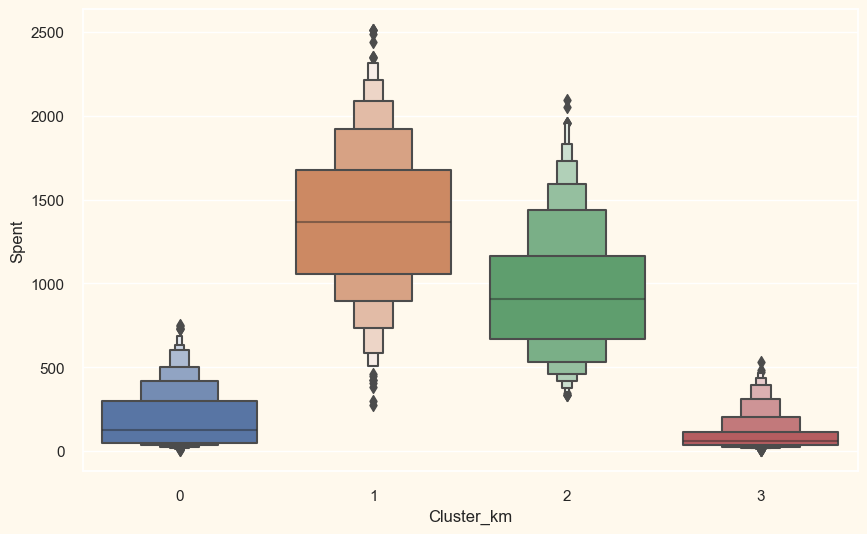

In [64]:
plt.figure(figsize = (10, 6))
sns.boxenplot(data=customer_encoded, x = 'Cluster_km', y = 'Spent')
plt.show()

- The plot above provides a visual representation indicating that **clusters 1 and 2** spending. 

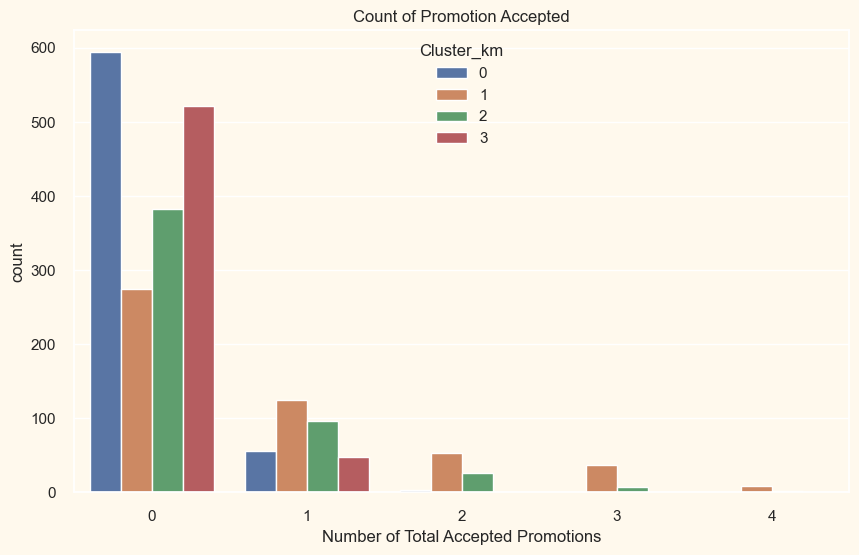

In [65]:
plt.figure(figsize = (10, 6))
sns.countplot(data=customer_encoded, x = 'Total_Promos', hue = 'Cluster_km')
plt.title("Count of Promotion Accepted")
plt.xlabel("Number of Total Accepted Promotions")
plt.show()

- The campaigns have not generated significant responses, with limited participation and no engagement with all five campaigns, indicating a need for more targeted and meticulously planned campaigns.

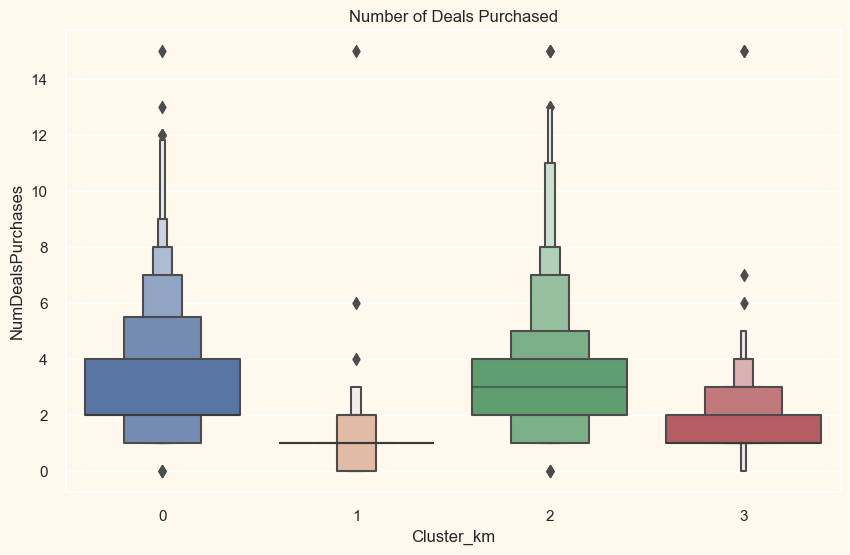

In [66]:
plt.figure(figsize = (10, 6))
sns.boxenplot(data=customer_encoded, x = 'Cluster_km', y = 'NumDealsPurchases')
plt.title("Number of Deals Purchased")
plt.show()

- The deals have shown promising outcomes. It has the best outcome with **Cluster 0 and Cluster 3.** However, our star customers **Cluster 1** are not much into the deals. Nothing seems to attract **Cluster 2** overwhelmingly.

<Figure size 800x600 with 0 Axes>

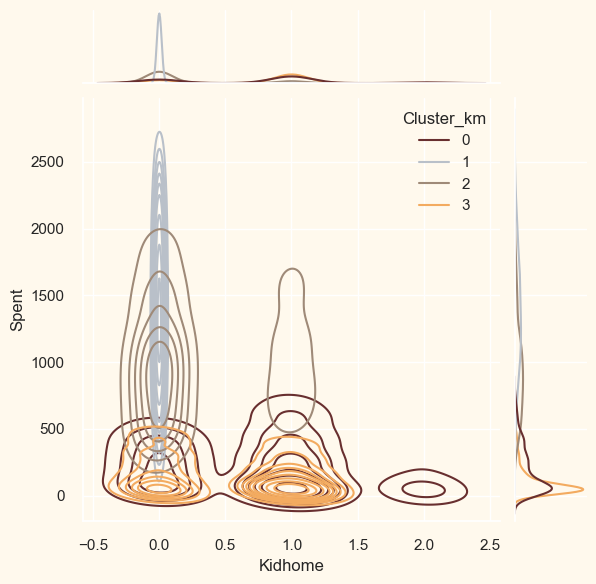

<Figure size 800x600 with 0 Axes>

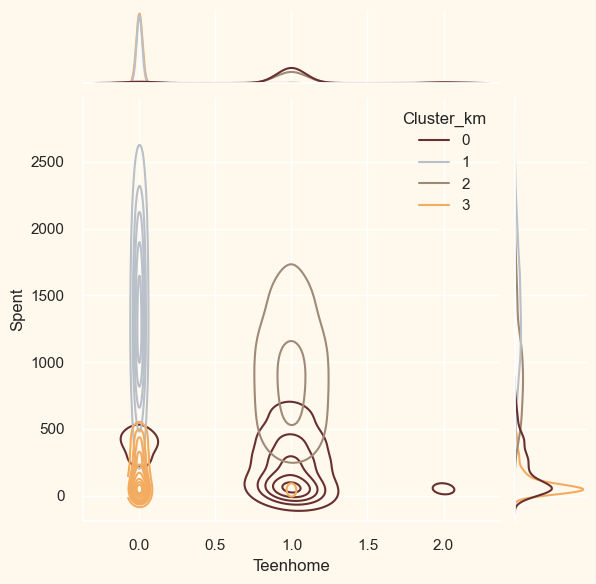

<Figure size 800x600 with 0 Axes>

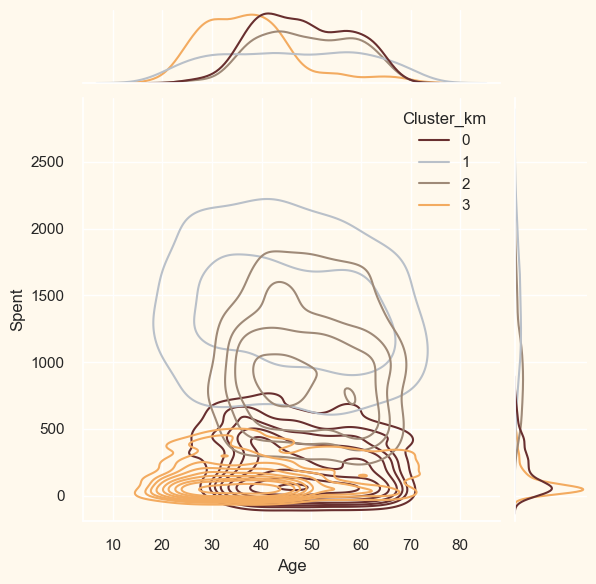

<Figure size 800x600 with 0 Axes>

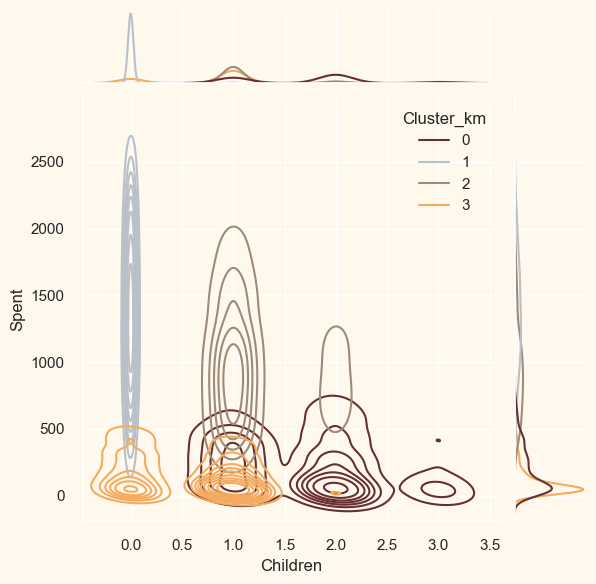

<Figure size 800x600 with 0 Axes>

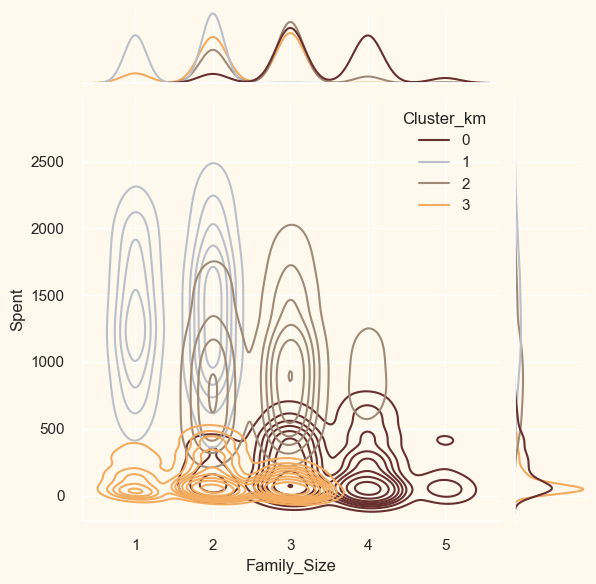

<Figure size 800x600 with 0 Axes>

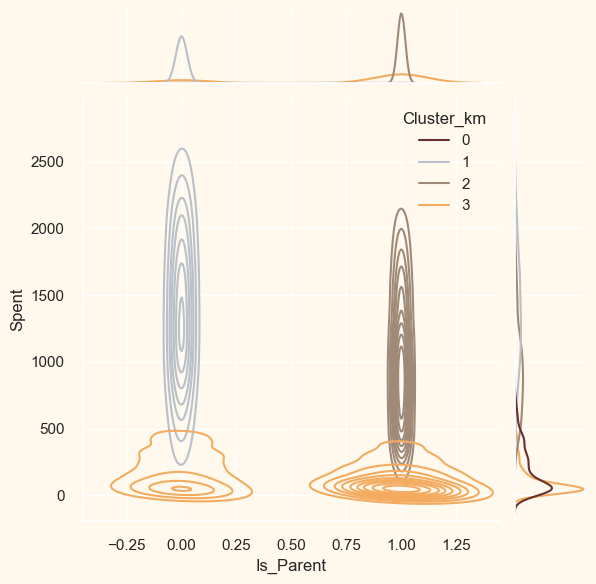

<Figure size 800x600 with 0 Axes>

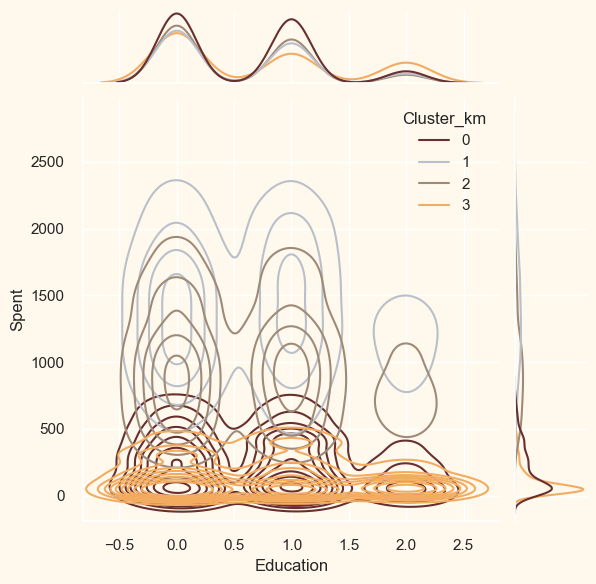

<Figure size 800x600 with 0 Axes>

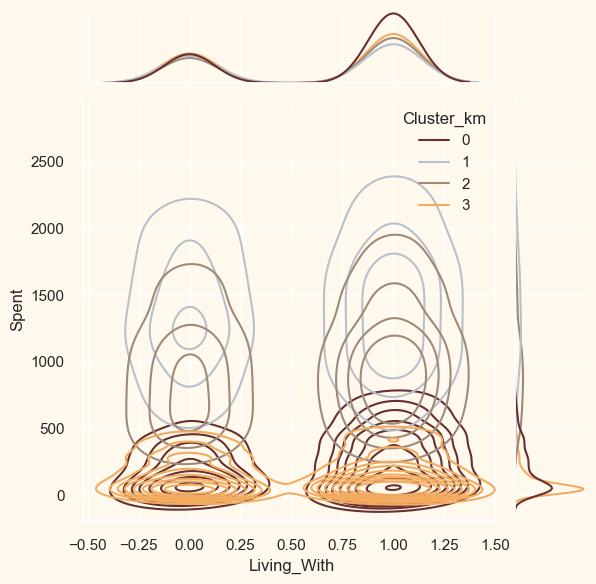

In [67]:
for i in profile:
    plt.figure(figsize = (8, 6))
    sns.jointplot(x = customer_encoded[i], 
                  y = customer_encoded['Spent'], 
                  hue = customer_encoded['Cluster_km'], 
                  kind = 'kde',
                 palette= pal)
    plt.show()

#### Conclusion from K-Means Clustering
1. Cluster 0:
    - Approximately 25 to 70 aged people.
    - The majority have two children at home.
    - At the max have 5 members in the family and at least 2. (5 family members fall into this Cluster).
    - Some have one or two kids, and some do not have any kids at home.
    - Low spending and low-income group.


2. Cluster 1:
    - They are not parents, and they don’t have children.
    - The family has 1 or 2 members.
    - Approximately 20 to 75 aged people.
    - Some have one kid, and some do not have any kids at home.
    - The majority have only one child at home.
    - High spending and high-income group.


3. Cluster 2:
    - The majority of these people are parents.
    - At the max have 3 members in the family and at least 1.
    - Span all ages.
    - The majority have a child at home.
    - Low spending and low-income group.


4. Cluster 3:
    - They are parents. 
    - Approximately 30 to 70 aged people.
    - At the max have 4 members in the family and at least 2. 
    - Some have one kid, and some do not have any kids at home.
    - The majority have a child at home.
    - Average spending and low-income group.

## 9. Model Comparison

In [71]:
# Evaluate using silhouette score
silhouette_scores = {
    'K-Means': silhouette_score(PCA_ds, customer_encoded['Cluster_km']),
    'Agglomerative ': silhouette_score(PCA_ds, customer_data['Clusters_agg']),
}

# Print silhouette scores for comparison
print("Silhouette Scores:")
for model, score in silhouette_scores.items():
    print(f"{model}: {score:.4f}")

Silhouette Scores:
K-Means: 0.3615
Agglomerative : 0.3531


- The **K-Means algorithm's Silhouette Score of 0.3615** indicates a moderately well-performing cluster, with a score closer to 1 indicating dense and well-separated clusters.
- The **Silhouette Score for Agglomerative Clustering is 0.3531**, slightly lower than K-Means. This score indicates well-defined clusters but may have less cohesion or separation compared to K-Means. A score closer to 1 indicates better clustering performance. Agglomerative Clustering performs similarly to K-Means

## 10. Save Models

In [68]:
pickle.dump(agg, open('models/1.1.agglomarative.pkl', 'wb'))
pickle.dump(kmeans, open('models/1.2.kmeans.pkl', 'wb'))

In [69]:
customer_data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  Postgraduate  58293.0        1         0       94    173      43   118   

   Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
0   172      88    88                  3                8   
1     2       1     6                  2                1   
2   111      21    42                  1                8   
3    10       3     5                  2                2   
4    46      27    15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0                   10                  4                  7         0   
1                    1                  2                  5         0   
2                    2                 10                  4         0   
3                    0                  4                  6         0   
4                    3                  6                  5         0   

   Response  Age   Spent Living_With  Children  Family_Size  Is_Parent  \
0         1   57  1617.0       Alone         0            1          0   
1         0   60    27.0       Alone         2            3          1   
2         0   49   776.0     Partner         0            2          0   
3         0   30    53.0     Partner         1            3          1   
4         0   33   422.0     Partner         1            3          1   

   Total_Promos  Clusters_agg  Cluster_km  
0             0             0           1  
1             0             3           0  
2             0             0           1  
3             0             1           3  
4             0             3           0

In [70]:
customer_data.to_csv('Data/Clustered_Customer_Personality_data.csv', index=False)

## Relating Clusters to the Problem
- **Understanding Customer Preferences:** By analyzing the clusters, businesses can gain a deeper understanding of customer preferences and behaviors. For example, Cluster 1 might consist of affluent, middle-aged customers who prefer luxury products, while Cluster 2 could comprise young, budget-conscious individuals who prioritize discounts and promotions.
- **Tailoring Marketing Strategies:** Each cluster represents a different target audience with distinct preferences and needs. Businesses can tailor their marketing strategies and product offerings to cater to the specific preferences of each cluster. For instance, Cluster 3, consisting of married customers with children, might respond well to family-oriented promotions and bundled deals.
- **Enhancing Customer Engagement:** Understanding the characteristics of each cluster enables businesses to engage with customers more effectively. For instance, Cluster 4, comprising tech-savvy millennials, might prefer personalized online experiences and targeted digital marketing campaigns over traditional advertising channels.
- **Optimizing Product Development:** Clustering analysis can also provide insights into product development opportunities. By identifying clusters with unmet needs or preferences, businesses can innovate and develop new products or services tailored to specific customer segments, thereby driving customer satisfaction and loyalty.


## Actionable Insights:
- Allocate marketing resources effectively by targeting high-value clusters with tailored campaigns.
- Develop personalized promotions and product recommendations to enhance customer engagement and loyalty.
- Optimize pricing and discount strategies based on the preferences of each cluster.
- Enhance customer service and support offerings to address the unique needs of different customer segments.
- Continuously monitor and analyze customer behavior to adapt strategies and offerings in response to changing preferences and market dynamics.
